<a href="https://colab.research.google.com/github/eileenthg/data-science-colabs/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RUN THIS SEGMENT BEFORE DOING ANYTHING!
This code segment:
- imports csv
- convert WindSpeed3pm from int to float
- map text labels to numbers. (Applies to booleans and wind direction)
- defines common visualisation functions used throughout the notebook

Note - Simillar data can be found from the following:
- https://datascienceplus.com/weather-forecast-with-regression-models-part-1/
- https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## Pandas datatable import

In [ ]:
import pandas as pd
weatherRaw = pd.read_csv("OddGroup_Dataset.csv")
weatherRaw

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1             39.0          E          W           4.0  ...           36   
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
4             50.0        SSE        ESE          20.0  ...           49   
..             ...        ...        ...           ...  ...          ...   
361           76.0        SSE         NW           7.0  ...           15   
362           48.0        NNW        NNW           2.0  ...           22   
363           43.0        ENE        ENE          11.0  ...           47   
364           46.0        SSW        WNW           6.0  ...           39   
365           78.0         NW        WNW          31.0  ...           13   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0         1019.7       1015.0         7         7     14.4     23.6   
1         1012.4       1008.4         5         3     17.5     25.7   
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
4         1018.3       1018.5         7         7     11.1     15.4   
..           ...          ...       ...       ...      ...      ...   
361       1016.1       1010.8         1         3     20.4     30.0   
362       1020.0       1016.9         0         1     17.2     28.2   
363       1024.0       1022.8         3         2     14.5     18.3   
364       1021.0       1016.2         6         7     15.8     25.9   
365       1009.6       1009.2         1         1     23.8     28.6   

     RainToday  RISK_MM RainTomorrow  
0           No      3.6          Yes  
1          Yes      3.6          Yes  
2          Yes     39.8          Yes  
3          Yes      2.8          Yes  
4          Yes      0.0           No  
..         ...      ...          ...  
361         No      0.0           No  
362         No      0.0           No  
363         No      0.0           No  
364         No      0.0           No  
365         No      0.0           No  

[366 rows x 22 columns]

## Type conversion, value mapping, and defining visualisation functions.

In [ ]:
weatherRaw['WindSpeed3pm'] = weatherRaw['WindSpeed3pm'].astype(float) #this feature was int. Convert to float.

# map text into identification numbers

# booleans
boolMap = {
    'Yes':1,
    'No':0
}

# wind direction
# https://windy.app/blog/what-is-wind-direction.html
dirMap = { 
    # 'No direction': -1,  #For when there is no wind. Added here for reference. Note not all NaN direction is for 0.0 wind speed 
    'N':0,
    'NNE':1,
    'NE':2,
    'ENE':3,
    'E':4,
    'ESE':5,
    'SE':6,
    'SSE':7,
    'S':8,
    'SSW':9,
    'SW':10,
    'WSW':11,
    'W':12,
    'WNW':13,
    'NW':14,
    'NNW':15,
}

weatherRaw.replace({
    'RainToday':boolMap,
    'RainTomorrow':boolMap,
    'WindGustDir':dirMap,
    'WindDir9am':dirMap,
    'WindDir3pm':dirMap,
    }, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_chart(feature, dataframe):
    ax = sns.countplot(x=feature, data=dataframe)
    plt.figure() # this one groups multiple plots together so they can show up together when plt.show() is called.

    count = len(dataframe[feature])
    get_count(ax, count)
    plt.plot()

    ax = sns.countplot(x=feature, data=dataframe, hue='RainTomorrow')
    get_count(ax, count)

    plt.show()
    plt.close()

def get_count(ax, count):
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2.5
        y = p.get_y() + p.get_height() + 1
        ax.annotate(p.get_height(), (x, y))

def plot_dist_chart(feature, dataframe):
  sns.kdeplot(data=dataframe, x=feature, color='G')
  sns.kdeplot(data=dataframe, x=feature, hue='RainTomorrow')
  plt.show()
  plt.close()

# Overview of raw data

In [ ]:
weatherRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    float64
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    float64
 8   WindDir3pm     365 non-null    float64
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    float64
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

Print all data in the dataset. (Check for complete import)
Read all data https://stackoverflow.com/questions/60079823/how-do-i-print-all-csv-with-pandas

In [ ]:
print(weatherRaw.to_string()) # prints everything

     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow
0        8.0     24.3       0.0          3.4       6.3         14.0           30.0        10.0        14.0           6.0          20.0           68           29       1019.7       1015.0         7         7     14.4     23.6          0      3.6             1
1       14.0     26.9       3.6          4.4       9.7          3.0           39.0         4.0        12.0           4.0          17.0           80           36       1012.4       1008.4         5         3     17.5     25.7          1      3.6             1
2       13.7     23.4       3.6          5.8       3.3         14.0           85.0         0.0         1.0           6.0           6.0           82           69       1009.5       1007.2         8         7     15.4     20.

# Visualise raw data

## Basic Visualisation - Features

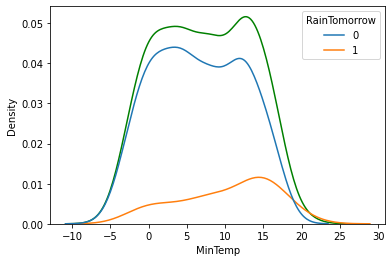

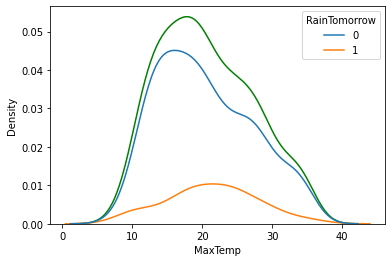

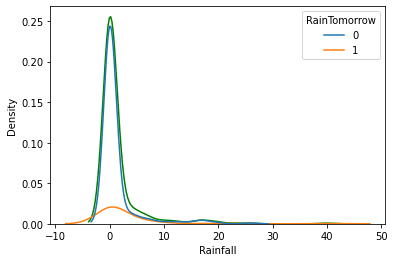

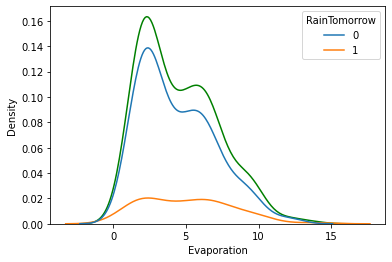

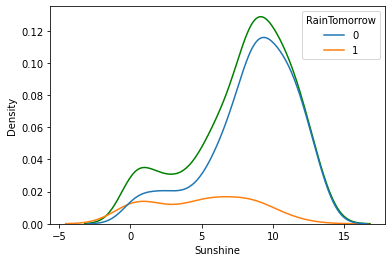

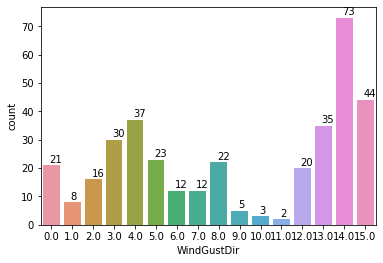

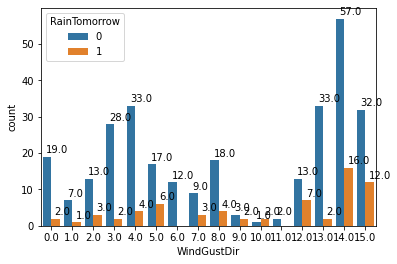

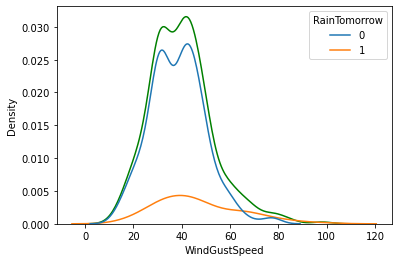

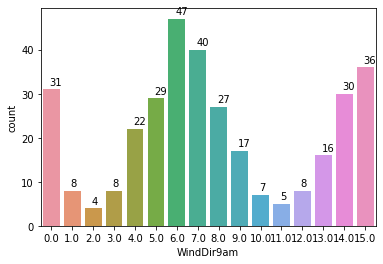

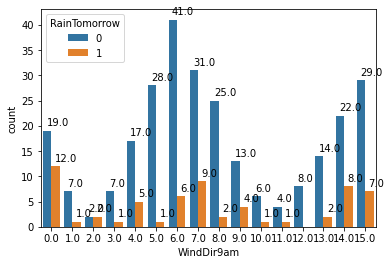

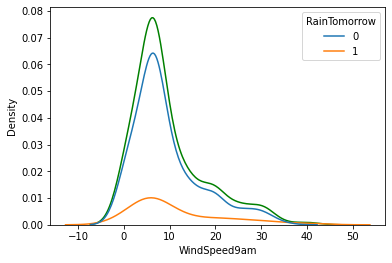

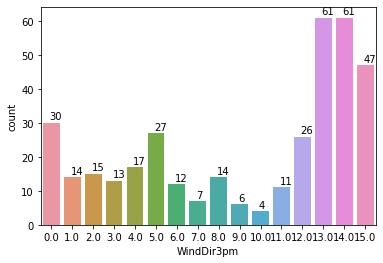

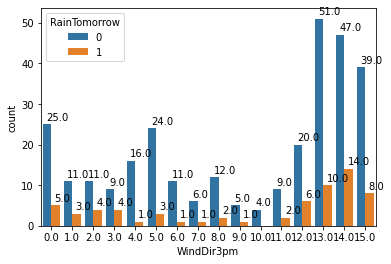

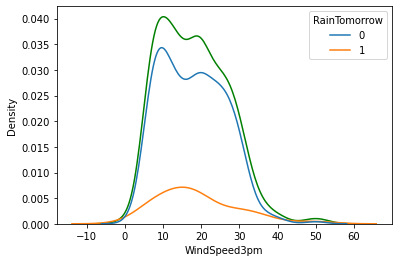

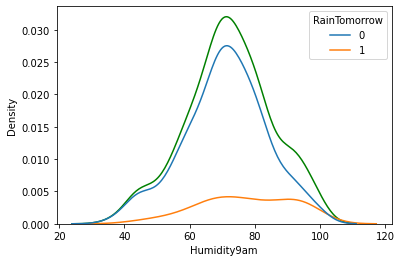

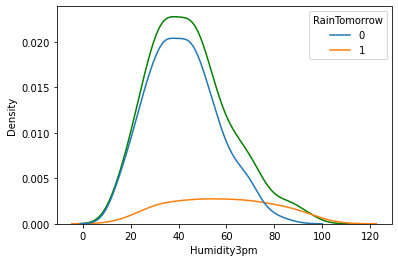

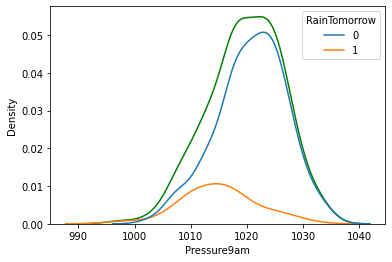

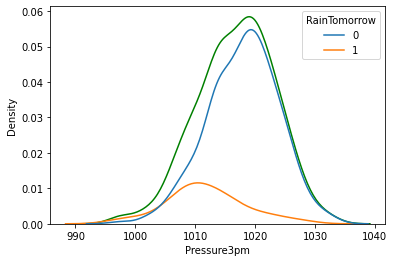

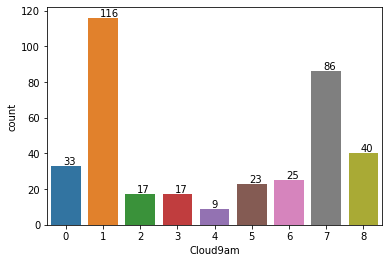

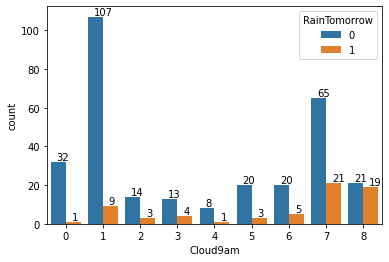

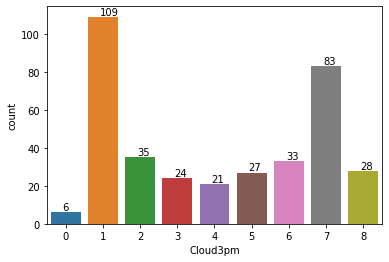

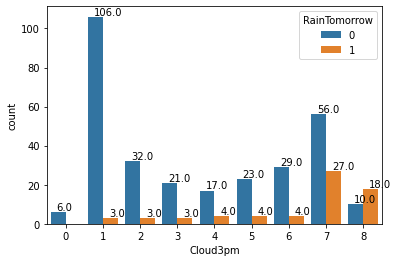

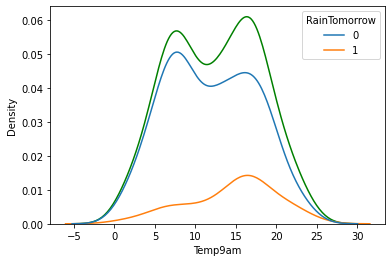

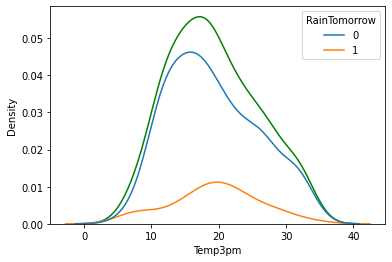

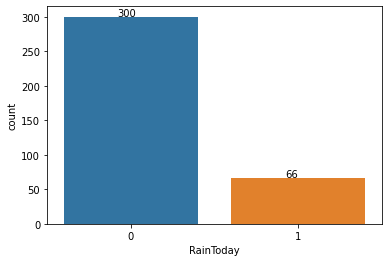

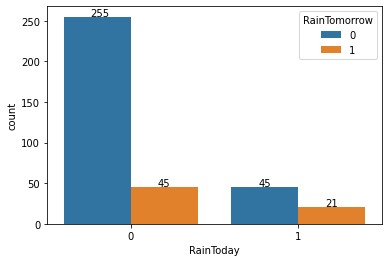

In [ ]:
# MinTemp - float
# MaxTemp - float
# Rainfall - float
# Evaporation - float
# Sunshine - float
# WindGustDir - object
# WindGust Speed - float
# WindDir9am - object
# WindSpeed9am - float
# WindDir3pm - object
# WindSpeed3pm - int(should be float)
# Humidity9am - int
# Humidity3pm - int
# Pressure9am float
# Pressure3pm float
# Cloud9am int (count)
# Cloud3pm int (count)
# Temp9am float
# Temp3pm float
# RainToday yes/no

feature_list = [
               ('MinTemp', 'cont'),
               ('MaxTemp', 'cont'),
               ('Rainfall', 'cont'),
               ('Evaporation', 'cont'),
               ('Sunshine', 'cont'),
               ('WindGustDir', 'object'),
               ('WindGustSpeed', 'cont'),
               ('WindDir9am', 'object'),
               ('WindSpeed9am', 'cont'),
               ('WindDir3pm', 'object'),
               ('WindSpeed3pm', 'cont'),
               ('Humidity9am', 'cont'),
               ('Humidity3pm', 'cont'),
               ('Pressure9am', 'cont'),
               ('Pressure3pm', 'cont'),
               ('Cloud9am', 'object'),
               ('Cloud3pm', 'object'),
               ('Temp9am', 'cont'),
               ('Temp3pm', 'cont'),
               ('RainToday', 'object')

]
for x in feature_list:
  if(x[1] == 'object'):
        plot_bar_chart(x[0], weatherRaw)
  if(x[1] == 'cont'):
      plot_dist_chart(x[0], weatherRaw)

# Note:
# - Green = Distribution of the entire dataset.
# - Blue = Distribution of the dataset that is classified as "0"
# - Orange = Distribution of the dataset that is classified as "1"

## Basic Visualisation - Target classes

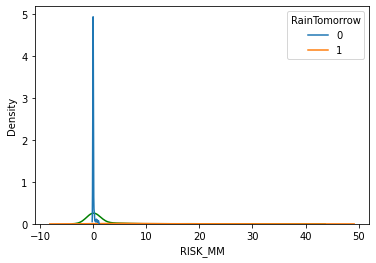

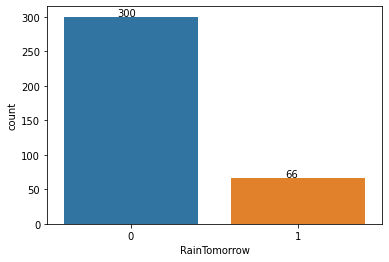

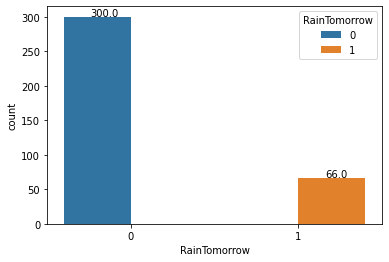

In [ ]:
# RISK_MM (how much rainfall to expect tomorrow)
# RainTomorrow

class_list = [
                ('RISK_MM', 'cont'),
                ('RainTomorrow', 'object')
]
for x in class_list:
  if(x[1] == 'object'):
    plot_bar_chart(x[0], weatherRaw)
  elif(x[1] == 'cont'):
    plot_dist_chart(x[0], weatherRaw)

Note on class set RainTomorrow:
- 18% instances classified as 1
- 82% instances classified as 0

We are dealing with an imbalanced data set.

Accuracy metrics consider prioritising weighted.
Try to oversample the data.

# Analyse feature importance

Assumed relationships:
- WinDir9am and WindSpeed9am are linked
- WindDir3pm and WindSpeed3pm are linked
- WindGustSpeed and WindGustDir are linked
- Any feature that has 9am and 3pm counterpart are linked by timeframe

Below analysis is done only for data with complete entries.
Risk_MM is dropped since it is the target class for regression problems, which is out of scope of the current project.


Performed analysis
- heatmap (basically useless, hard to interpret)
- PCA to identify important features

## Get dataset with no null values

In [ ]:
weatherNoNull = weatherRaw.dropna()
weatherNoNull = weatherNoNull.drop(columns='RISK_MM')


In [ ]:
weatherNoNull.info()

# 366 entries, 328 complete
# percentage of entries with missing values.
print((366 - 328)/366)
# around 10% of rows have missing data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 365
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        328 non-null    float64
 1   MaxTemp        328 non-null    float64
 2   Rainfall       328 non-null    float64
 3   Evaporation    328 non-null    float64
 4   Sunshine       328 non-null    float64
 5   WindGustDir    328 non-null    float64
 6   WindGustSpeed  328 non-null    float64
 7   WindDir9am     328 non-null    float64
 8   WindDir3pm     328 non-null    float64
 9   WindSpeed9am   328 non-null    float64
 10  WindSpeed3pm   328 non-null    float64
 11  Humidity9am    328 non-null    int64  
 12  Humidity3pm    328 non-null    int64  
 13  Pressure9am    328 non-null    float64
 14  Pressure3pm    328 non-null    float64
 15  Cloud9am       328 non-null    int64  
 16  Cloud3pm       328 non-null    int64  
 17  Temp9am        328 non-null    float64
 18  Temp3pm   

## Generate correlation heatmap

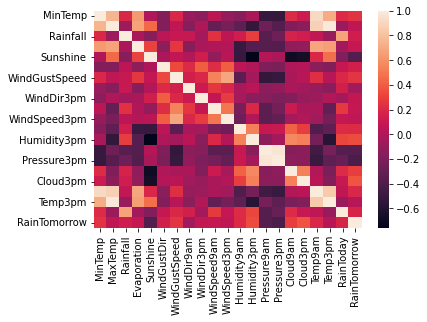

In [ ]:
import seaborn as sns

plot = sns.heatmap(weatherNoNull.corr())
plt.show()

## Implementing PCA with Scikit

https://scikit-learn.org/stable/modules/decomposition.html#pca 

https://stackoverflow.com/questions/44105773/how-do-i-show-a-scatter-plot-in-python-after-doing-pca



Referred to this in the end: 

https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

Note: it's normal for accuracy to fall after removing info. Better that than potentially overfitting.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas as pd
import sys

explain_variance = 0.9
# 0 < x < 1: Value of explained variance
# x > 1: Number of components for PCA
# None: Use all 20 components
# Cannot be larger than 20

# fitting PCA
xPCA = weatherNoNull.iloc[:, :-1]
yPCA = weatherNoNull.iloc[:, -1]

# usually good idea to scale the data
scaler = StandardScaler()
scaler.fit_transform(xPCA)

pcaBase = PCA(n_components=explain_variance) #max 20 due to 20 features
x_new = pcaBase.fit_transform(xPCA) 

# print('regular xPCA')
# print(xPCA.iloc[0:5, :])
# print()
# print('transformed x')
# np.set_printoptions(threshold=sys.maxsize)
# print(x_new[0:5, :])
# print()

# print(len(x_new[0])) # just checking. There are 20 features. oh boy.

# to plot 2 features together on a regular scatter plot
# plt.scatter(x_new[:, 0], x_new[:, 1], c = y)
# plt.show()

feature_list = [
               ('MinTemp', 'cont'),
               ('MaxTemp', 'cont'),
               ('Rainfall', 'cont'),
               ('Evaporation', 'cont'),
               ('Sunshine', 'cont'),
               ('WindGustDir', 'object'),
               ('WindGustSpeed', 'cont'),
               ('WindDir9am', 'object'),
               ('WindSpeed9am', 'cont'),
               ('WindDir3pm', 'object'),
               ('WindSpeed3pm', 'cont'),
               ('Humidity9am', 'cont'),
               ('Humidity3pm', 'cont'),
               ('Pressure9am', 'cont'),
               ('Pressure3pm', 'cont'),
               ('Cloud9am', 'object'),
               ('Cloud3pm', 'object'),
               ('Temp9am', 'cont'),
               ('Temp3pm', 'cont'),
               ('RainToday', 'object')

]

initial_feature_names = [feature_list[i][0] for i in range(len(feature_list))]


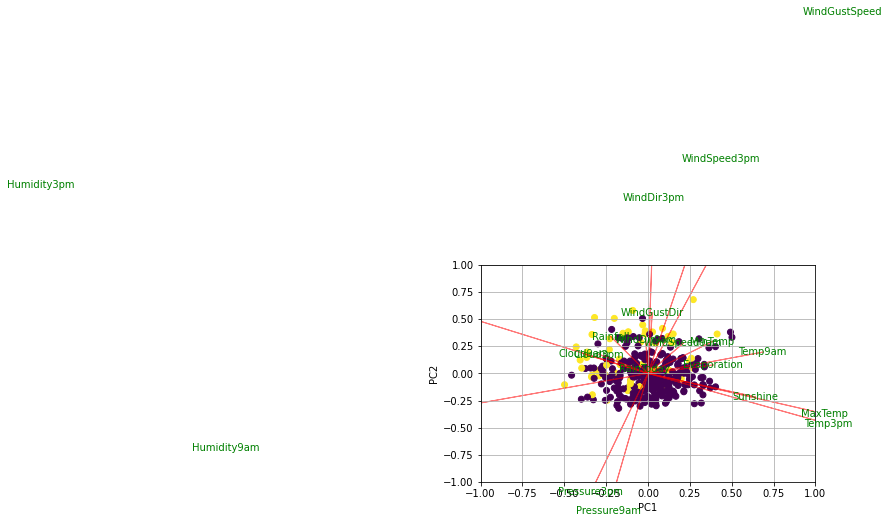

Most important features index: [12, 6, 0, 11, 6, 9, 10]

Most important features: 
     0              1
0  PC0    Humidity3pm
1  PC1  WindGustSpeed
2  PC2        MinTemp
3  PC3    Humidity9am
4  PC4  WindGustSpeed
5  PC5     WindDir3pm
6  PC6   WindSpeed3pm

Explained variance
[411.88987066 293.44228303 143.38251564  88.38160438  40.05550606
  34.45673953  24.31373997]

Explained variance ratio
[0.36493449 0.25998991 0.12703693 0.07830612 0.03548918 0.03052868
 0.02154198]

Component array
[[ 0.07687589  0.21038073 -0.04433198  0.07753299  0.12784839  0.00507756
   0.23190492 -0.00274139  0.04215328  0.00703804  0.08697569 -0.50497403
  -0.72527936 -0.04755721 -0.0682524  -0.07722733 -0.05829351  0.13709918
   0.21488646 -0.00449268]
 [ 0.0587072  -0.07417728  0.06736835  0.0154105  -0.04303352  0.11084425
   0.66469542  0.0616357   0.0554976   0.32328462  0.3937402  -0.13736198
   0.34729128 -0.25278903 -0.21860552  0.03609586  0.03498357  0.03910271
  -0.09278147  0.0076978 ]
 [-0.4

In [ ]:
# ripped from stack overflow on coding biplots, also referred to their linked article
rank = False
labelsVar = initial_feature_names
scatterVar = True
nameVar = True
magnifyVar = 5


def myplot(score,coeff,labels=None, scatter=True, name=True, magnify=2):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0] # dealing with how many coefficients
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    if scatter==True:
      plt.scatter(xs * scalex,ys * scaley, c = yPCA)
    for i in range(n):
      # if i == 12 or i == 6 or i == 0:
        plt.arrow(0, 0, coeff[i,0] * magnify, coeff[i,1] * magnify,color = 'r',alpha = 0.5)
        if labels is None or name == False:
            plt.text(coeff[i,0]* magnify, coeff[i,1] * magnify, "Var"+str(i), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* magnify, coeff[i,1] * magnify, labels[i], color = 'g', ha = 'center', va = 'center')

    # definte ranges?
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

# Generate biplot
try:
  myplot(score=x_new[:,0:2], coeff=np.transpose(pcaBase.components_[0:2, : ]), labels=labelsVar, scatter=scatterVar, name=nameVar, magnify=magnifyVar)
except Exception as e:
  print(e)


# number of components
n_pcs= pcaBase.components_.shape[0] #determined by PCA(n_components = xx)

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = []



for i in range(n_pcs):
  if rank == True:
    foo = [np.abs(pcaBase.components_[i]).argmax(), np.argsort(np.abs(pcaBase.components_[i]), axis=0)[-2], np.argsort(np.abs(pcaBase.components_[i]), axis=0)[-3]]
    
    most_important.append(foo)
    # most_important[i][0] = np.abs(pcaBase.components_[i]) 
    # most_important[i][1] = np.argsort(np.max(np.abs(pcaBase.components_[i]), axis=0))[-2]
    # most_important[i][2] = np.argsort(np.max(np.abs(pcaBase.components_[i]), axis=0))[-3]
  else:
    most_important.append(np.abs(pcaBase.components_[i]).argmax())

print('Most important features index: ', end='')
print(most_important)
print()


# get the names
most_important_names = []
for i in range(n_pcs):
  if rank == True:
    foo = [initial_feature_names[most_important[i][0]], initial_feature_names[most_important[i][1]], initial_feature_names[most_important[i][2]] ]
    most_important_names.append(foo)
  else:
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print('Most important features: ')
print(df.to_string())
print()

# list of features to keep
keepFeatureList = list(df.iloc[:, 1])
keepFeatureCount = len(keepFeatureList)

# print the eigenvalues
# Print options: https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html 
np.set_printoptions(suppress=True)
print('Explained variance')
print(pcaBase.explained_variance_)
print()
print('Explained variance ratio')
print(pcaBase.explained_variance_ratio_)
print()
print('Component array')
print(pcaBase.components_)
print()

Additional notes:
- https://www.statisticshowto.com/explained-variance-variation/
- https://www.youtube.com/watch?v=152tSYtiQbw&ab_channel=ritvikmath 
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis


# Data preprocessing



## Features with missing values

Refer from: https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe 

## RUN THIS BLOCK FIRST!!

               Missing Count
WindDir9am                31
WindSpeed9am               7
Sunshine                   3
WindGustDir                3
WindGustSpeed              2
WindDir3pm                 1


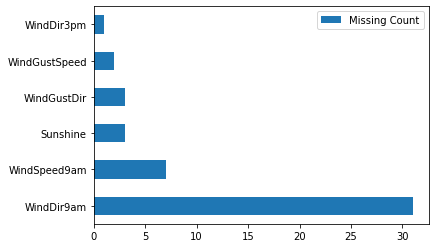

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = df.isnull().sum()    
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Count' :na_df})
        ax = missing_data.plot.barh()
        print(missing_data)
        plt.show()
    else:
        print('No NAs found')
plot_nas(weatherRaw)

## Peek at rows with missing data
- https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe 

In [ ]:
weatherHasNull = weatherRaw[weatherRaw.isna().any(axis=1)]
weatherHasNull

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
113     12.7     28.6       6.6          3.2       8.6         12.0   
118     11.7     27.6       0.0          7.8       8.1         12.0   
127     10.8     29.2       0.0          8.4       7.5          4.0   
138     12.5     29.9       0.0          5.8      10.7         14.0   
140     11.5     29.3       0.0          5.2       8.0         14.0   
174      7.5     19.0       0.0          4.0       6.8          3.0   
176      5.0     20.9       0.0          2.0       8.9         13.0   
180     -2.1     13.8       0.2          1.8       9.5         15.0   
189     -0.2     18.1       0.0          4.4       9.4         14.0   
193      9.4     19.2       0.0          2.2       7.7          NaN   
195      2.2     18.6       0.0          2.0       9.2         15.0   
200     -2.7     18.1       0.0          2.2       9.3         12.0   
208      4.9     18.1       5.2          1.2       8.5         15.0   
209      1.4     16.8       0.0          1.6       8.2         14.0   
211     -0.1     18.0       0.0          2.0       8.6          NaN   
212     -0.9     18.5       0.0          2.2       8.9          4.0   
213      0.6     14.0       0.0          2.2       2.7          2.0   
221      7.4     16.3       0.0          1.2       NaN          1.0   
222      8.6     13.7       6.2          2.2       0.0         14.0   
237      4.3     12.6       0.0          2.0       9.0         14.0   
247     -0.1     14.2       0.0          1.4       7.0         12.0   
249      3.0     11.1       0.8          1.4       0.2         12.0   
250      2.9      9.5      16.8          1.4       6.5         14.0   
255      0.5     11.0       0.0          1.0       0.9         15.0   
257     -1.7     13.6       0.0          1.8       5.2         15.0   
259     -1.8     11.5       0.0          0.6       4.7         15.0   
262     -1.1     11.0       0.2          1.8       0.0         13.0   
271      0.8     12.2       0.0          1.8       8.6          NaN   
272     -2.8     12.2       0.0          2.6       8.7         15.0   
273     -2.8     14.1       0.0          2.2       6.8         13.0   
278     -1.9     10.9       0.0          1.8       4.2          8.0   
299     -1.5     17.3       0.0          2.8       9.0         14.0   
300     -3.3     15.1       0.0          3.0       NaN          9.0   
302     -0.2     16.2       0.0          3.4       5.9          4.0   
312      0.2     15.5       1.0          2.4       9.4          6.0   
348     11.9     21.1      13.2          6.6       NaN         14.0   
351      5.0     24.1       0.0          6.2      12.0         15.0   
360      7.9     26.1       0.0          6.8       3.5         15.0   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
113           50.0         NaN        12.0           NaN  ...           42   
118           48.0         NaN        12.0           NaN  ...           25   
127           50.0         NaN         3.0           NaN  ...           34   
138           43.0         NaN        13.0           0.0  ...           30   
140           46.0         NaN        11.0           0.0  ...           35   
174           26.0         NaN         5.0           0.0  ...           43   
176           22.0         NaN        14.0           0.0  ...           42   
180           22.0         NaN        15.0           0.0  ...           40   
189           24.0         NaN        14.0           0.0  ...           44   
193           24.0         4.0        15.0           4.0  ...           47   
195           31.0         NaN        15.0           NaN  ...           44   
200           52.0         NaN        13.0           0.0  ...           36   
208           22.0         NaN        14.0           0.0  ...           55   
209           20.0         NaN        14.0           0.0  ...           50   
211            NaN         0.0        15.0           2.0  ...    

## Data cleaning

### Direction for no wind
If Windspeed = 0, then no wind direction (and therefore no values supplied). Therefore use -1 for no direction.

In [ ]:
weatherClean = weatherRaw.copy(deep = True)
# weatherClean.loc[0, 'WindDir3pm']

weatherClean['WindDir3pm'] = [-1.0 if weatherClean.loc[i,'WindSpeed3pm'] == 0.0 else weatherClean.loc[i,'WindDir3pm'] for i in range(0, len(weatherClean.index))]
weatherClean['WindDir9am'] = [-1.0 if weatherClean.loc[i,'WindSpeed9am'] == 0.0 else weatherClean.loc[i,'WindDir9am'] for i in range(0, len(weatherClean.index))]
weatherClean.loc[:, ['WindDir3pm','WindSpeed3pm','WindDir9am','WindSpeed9am']] # prints the updated columns

WindDir3pm  WindSpeed3pm  WindDir9am  WindSpeed9am
0          14.0          20.0        10.0           6.0
1          12.0          17.0         4.0           4.0
2           1.0           6.0         0.0           6.0
3          12.0          24.0        13.0          30.0
4           5.0          28.0         7.0          20.0
..          ...           ...         ...           ...
361        14.0          50.0         7.0           7.0
362        15.0          19.0        15.0           2.0
363         3.0           9.0         3.0          11.0
364        13.0          28.0         9.0           6.0
365        13.0          35.0        14.0          31.0

[366 rows x 4 columns]

Null value count post WindDir correction

               Missing Count
WindDir9am                 7
WindSpeed9am               7
Sunshine                   3
WindGustDir                3
WindGustSpeed              2


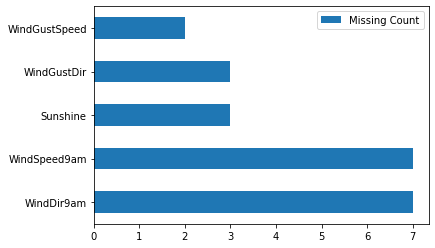

WindDir9am  WindSpeed9am  Sunshine  WindGustDir  WindGustSpeed
113         NaN           NaN       8.6         12.0           50.0
118         NaN           NaN       8.1         12.0           48.0
127         NaN           NaN       7.5          4.0           50.0
193         4.0           4.0       7.7          NaN           24.0
195         NaN           NaN       9.2         15.0           31.0
211         0.0           2.0       8.6          NaN            NaN
213         NaN           NaN       2.7          2.0           17.0
221         7.0           6.0       NaN          1.0           30.0
247         NaN           NaN       7.0         12.0           13.0
257         NaN           NaN       5.2         15.0           28.0
271         8.0          19.0       8.6          NaN            NaN
300         7.0           9.0       NaN          9.0           30.0
348         1.0           7.0       NaN         14.0           41.0

In [ ]:
weatherHasNull = weatherClean[weatherClean.isna().any(axis=1)]

plot_nas(weatherClean)

weatherHasNull.loc[:, ['WindDir9am','WindSpeed9am','Sunshine','WindGustDir','WindGustSpeed']]

### Imputing missing data


 #### Separating NaN rows, and dropping NaN from clean dataset,


---


*   List item
*   List item



In [ ]:
weatherImpute = weatherClean[weatherClean.isna().any(axis=1)]
weatherClean = weatherClean.dropna()

In [ ]:
weatherClean

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3         14.0   
1       14.0     26.9       3.6          4.4       9.7          3.0   
2       13.7     23.4       3.6          5.8       3.3         14.0   
3       13.3     15.5      39.8          7.2       9.1         14.0   
4        7.6     16.1       2.8          5.6      10.6          7.0   
..       ...      ...       ...          ...       ...          ...   
361      9.0     30.7       0.0          7.6      12.1         15.0   
362      7.1     28.4       0.0         11.6      12.7          0.0   
363     12.5     19.9       0.0          8.4       5.3          5.0   
364     12.5     26.9       0.0          5.0       7.1         14.0   
365     12.3     30.2       0.0          6.0      12.6         14.0   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0        10.0        14.0           6.0  ...           29   
1             39.0         4.0        12.0           4.0  ...           36   
2             85.0         0.0         1.0           6.0  ...           69   
3             54.0        13.0        12.0          30.0  ...           56   
4             50.0         7.0         5.0          20.0  ...           49   
..             ...         ...         ...           ...  ...          ...   
361           76.0         7.0        14.0           7.0  ...           15   
362           48.0        15.0        15.0           2.0  ...           22   
363           43.0         3.0         3.0          11.0  ...           47   
364           46.0         9.0        13.0           6.0  ...           39   
365           78.0        14.0        13.0          31.0  ...           13   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0         1019.7       1015.0         7         7     14.4     23.6   
1         1012.4       1008.4         5         3     17.5     25.7   
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
4         1018.3       1018.5         7         7     11.1     15.4   
..           ...          ...       ...       ...      ...      ...   
361       1016.1       1010.8         1         3     20.4     30.0   
362       1020.0       1016.9         0         1     17.2     28.2   
363       1024.0       1022.8         3         2     14.5     18.3   
364       1021.0       1016.2         6         7     15.8     25.9   
365       1009.6       1009.2         1         1     23.8     28.6   

     RainToday  RISK_MM  RainTomorrow  
0            0      3.6             1  
1            1      3.6             1  
2            1     39.8             1  
3            1      2.8             1  
4            1      0.0             0  
..         ...      ...           ...  
361          0      0.0             0  
362          0      0.0             0  
363          0      0.0             0  
364          0      0.0             0  
365          0      0.0             0  

[353 rows x 22 columns]

In [ ]:
weatherImpute

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
113     12.7     28.6       6.6          3.2       8.6         12.0   
118     11.7     27.6       0.0          7.8       8.1         12.0   
127     10.8     29.2       0.0          8.4       7.5          4.0   
193      9.4     19.2       0.0          2.2       7.7          NaN   
195      2.2     18.6       0.0          2.0       9.2         15.0   
211     -0.1     18.0       0.0          2.0       8.6          NaN   
213      0.6     14.0       0.0          2.2       2.7          2.0   
221      7.4     16.3       0.0          1.2       NaN          1.0   
247     -0.1     14.2       0.0          1.4       7.0         12.0   
257     -1.7     13.6       0.0          1.8       5.2         15.0   
271      0.8     12.2       0.0          1.8       8.6          NaN   
300     -3.3     15.1       0.0          3.0       NaN          9.0   
348     11.9     21.1      13.2          6.6       NaN         14.0   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
113           50.0         NaN        12.0           NaN  ...           42   
118           48.0         NaN        12.0           NaN  ...           25   
127           50.0         NaN         3.0           NaN  ...           34   
193           24.0         4.0        15.0           4.0  ...           47   
195           31.0         NaN        15.0           NaN  ...           44   
211            NaN         0.0        15.0           2.0  ...           46   
213           17.0         NaN         3.0           NaN  ...           67   
221           30.0         7.0         2.0           6.0  ...           65   
247           13.0         NaN        13.0           NaN  ...           55   
257           28.0         NaN        15.0           NaN  ...           46   
271            NaN         8.0         8.0          19.0  ...           49   
300           30.0         7.0         6.0           9.0  ...           23   
348           41.0         1.0         0.0           7.0  ...           61   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
113       1008.3       1002.3         5         5     16.5     27.4   
118       1013.6       1009.1         2         6     17.6     26.8   
127       1021.6       1017.7         0         7     17.5     27.7   
193       1024.2       1020.3         7         1     12.1     18.8   
195       1024.4       1021.0         1         3      8.5     17.8   
211       1033.2       1028.7         1         1      5.6     17.4   
213       1032.3       1028.9         7         7      4.6     13.9   
221       1031.4       1027.9         7         7     12.1     14.5   
247       1032.9       1028.9         1         2      4.7     12.6   
257       1023.0       1020.1         1         7      3.9     13.3   
271       1020.9       1016.8         3         1      6.5     11.2   
300       1027.7       1025.5         1         1      7.9     14.4   
348       1019.2       1016.7         7         3     14.5     19.4   

     RainToday  RISK_MM  RainTomorrow  
113          1      0.0             0  
118          0      0.0             0  
127          0      3.0             1  
193          0      0.0             0  
195          0      0.0             0  
211          0      0.0             0  
213          0      0.0             0  
221          0      6.2             1  
247          0      0.0             0  
257          0      0.2             0  
271          0      0.0             0  
300          0      0.0             0  
348          1      0.6             0  

[13 rows x 22 columns]

#### WindGustDir with existing WindGustSpeed (row 193)
- 1 value needed
- Use median value from other rows where WindGustSpeed == 24.0 
(median because based on data there's outliers. see row 202)

In [ ]:
weatherFoo = weatherClean[weatherClean['WindGustSpeed'] == 24.0].loc[:, ['WindGustDir', 'WindGustSpeed']]
print(weatherFoo.to_string())
median = weatherFoo['WindGustDir'].median()
print()
weatherImpute.loc[193, 'WindGustDir'] = median
# Note: Above line raises 'SettingWithCopyWarning'. Probably from setting the median value (a float) to a different table? I used .loc, so it should be safe to ignore.
print('Post sub')
print(weatherImpute.loc[193, ['WindGustDir', 'WindGustSpeed']].to_string())

     WindGustDir  WindGustSpeed
128         15.0           24.0
130         13.0           24.0
189         14.0           24.0
202          4.0           24.0
235         14.0           24.0

Post sub
WindGustDir      14.0
WindGustSpeed    24.0


#### WindGustDir/WindGustSpeed pair
- 3 values needed
- Speed must be equal or larger than 9am/3pm
- Direction should choose an average (least affect the dataset)

1. Find the median direction (round to nearest int)
2. Pick a value for speed from the average direction
3. Ensure value for speed is equal or greater than 9am or 3pm counterpart

In [ ]:
weatherFoo = weatherClean.loc[:, ['WindGustDir']]
gustDirMedian = weatherFoo['WindGustDir'].median()
print('Median gust direction: ', end='')
print(gustDirMedian)
weatherImpute['WindGustDir'].fillna(value=float(gustDirMedian), inplace=True) # make sure to convert to float or else it won't work.

weatherFoo = weatherClean[weatherClean['WindGustDir'] == float(gustDirMedian)].loc[:, ['WindGustDir', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm']]
gustSpeedMedian = weatherFoo['WindGustSpeed'].median()
print('Median gust speed: ', end='')
print(gustSpeedMedian)
if(gustSpeedMedian > weatherFoo['WindSpeed9am'].max() and gustSpeedMedian > weatherFoo['WindSpeed3pm'].max()):
  weatherImpute['WindGustSpeed'].fillna(value=float(gustSpeedMedian), inplace=True)
else:
  print(gustSpeedMedian)
  print(weatherFoo['WindSpeed9am'].max())
  print(weatherFoo['WindSpeed3pm'].max())
  raise Exception('Median speed is smaller than maximum wind speed for median direction. Need to fix.')
weatherImpute

Median gust direction: 8.0
Median gust speed: 48.0


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
113     12.7     28.6       6.6          3.2       8.6         12.0   
118     11.7     27.6       0.0          7.8       8.1         12.0   
127     10.8     29.2       0.0          8.4       7.5          4.0   
193      9.4     19.2       0.0          2.2       7.7         14.0   
195      2.2     18.6       0.0          2.0       9.2         15.0   
211     -0.1     18.0       0.0          2.0       8.6          8.0   
213      0.6     14.0       0.0          2.2       2.7          2.0   
221      7.4     16.3       0.0          1.2       NaN          1.0   
247     -0.1     14.2       0.0          1.4       7.0         12.0   
257     -1.7     13.6       0.0          1.8       5.2         15.0   
271      0.8     12.2       0.0          1.8       8.6          8.0   
300     -3.3     15.1       0.0          3.0       NaN          9.0   
348     11.9     21.1      13.2          6.6       NaN         14.0   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
113           50.0         NaN        12.0           NaN  ...           42   
118           48.0         NaN        12.0           NaN  ...           25   
127           50.0         NaN         3.0           NaN  ...           34   
193           24.0         4.0        15.0           4.0  ...           47   
195           31.0         NaN        15.0           NaN  ...           44   
211           48.0         0.0        15.0           2.0  ...           46   
213           17.0         NaN         3.0           NaN  ...           67   
221           30.0         7.0         2.0           6.0  ...           65   
247           13.0         NaN        13.0           NaN  ...           55   
257           28.0         NaN        15.0           NaN  ...           46   
271           48.0         8.0         8.0          19.0  ...           49   
300           30.0         7.0         6.0           9.0  ...           23   
348           41.0         1.0         0.0           7.0  ...           61   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
113       1008.3       1002.3         5         5     16.5     27.4   
118       1013.6       1009.1         2         6     17.6     26.8   
127       1021.6       1017.7         0         7     17.5     27.7   
193       1024.2       1020.3         7         1     12.1     18.8   
195       1024.4       1021.0         1         3      8.5     17.8   
211       1033.2       1028.7         1         1      5.6     17.4   
213       1032.3       1028.9         7         7      4.6     13.9   
221       1031.4       1027.9         7         7     12.1     14.5   
247       1032.9       1028.9         1         2      4.7     12.6   
257       1023.0       1020.1         1         7      3.9     13.3   
271       1020.9       1016.8         3         1      6.5     11.2   
300       1027.7       1025.5         1         1      7.9     14.4   
348       1019.2       1016.7         7         3     14.5     19.4   

     RainToday  RISK_MM  RainTomorrow  
113          1      0.0             0  
118          0      0.0             0  
127          0      3.0             1  
193          0      0.0             0  
195          0      0.0             0  
211          0      0.0             0  
213          0      0.0             0  
221          0      6.2             1  
247          0      0.0             0  
257          0      0.2             0  
271          0      0.0             0  
300          0      0.0             0  
348          1      0.6             0  

[13 rows x 22 columns]

#### WindDir9am/WindSpeed9am pair
- 7 values needed
- Same as gust, without the maximum value limitation.


In [ ]:
weatherFoo = weatherClean.loc[:, ['WindDir9am']].dropna()
gustDirMedian = weatherFoo['WindDir9am'].median()
print('Median 9am direction: ', end='')
print(gustDirMedian)
weatherImpute['WindDir9am'].fillna(value=float(gustDirMedian), inplace=True) # make sure to convert to float or else it won't work.

weatherFoo = weatherClean[weatherClean['WindDir9am'] == float(gustDirMedian)].loc[:, ['WindDir9am','WindSpeed9am']]
gustSpeedMedian = weatherFoo['WindSpeed9am'].median()
print('Median 9am speed: ', end='')
print(gustSpeedMedian)
weatherImpute['WindSpeed9am'].fillna(value=float(gustSpeedMedian), inplace=True)
weatherImpute

Median 9am direction: 7.0
Median 9am speed: 7.0


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
113     12.7     28.6       6.6          3.2       8.6         12.0   
118     11.7     27.6       0.0          7.8       8.1         12.0   
127     10.8     29.2       0.0          8.4       7.5          4.0   
193      9.4     19.2       0.0          2.2       7.7         14.0   
195      2.2     18.6       0.0          2.0       9.2         15.0   
211     -0.1     18.0       0.0          2.0       8.6          8.0   
213      0.6     14.0       0.0          2.2       2.7          2.0   
221      7.4     16.3       0.0          1.2       NaN          1.0   
247     -0.1     14.2       0.0          1.4       7.0         12.0   
257     -1.7     13.6       0.0          1.8       5.2         15.0   
271      0.8     12.2       0.0          1.8       8.6          8.0   
300     -3.3     15.1       0.0          3.0       NaN          9.0   
348     11.9     21.1      13.2          6.6       NaN         14.0   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
113           50.0         7.0        12.0           7.0  ...           42   
118           48.0         7.0        12.0           7.0  ...           25   
127           50.0         7.0         3.0           7.0  ...           34   
193           24.0         4.0        15.0           4.0  ...           47   
195           31.0         7.0        15.0           7.0  ...           44   
211           48.0         0.0        15.0           2.0  ...           46   
213           17.0         7.0         3.0           7.0  ...           67   
221           30.0         7.0         2.0           6.0  ...           65   
247           13.0         7.0        13.0           7.0  ...           55   
257           28.0         7.0        15.0           7.0  ...           46   
271           48.0         8.0         8.0          19.0  ...           49   
300           30.0         7.0         6.0           9.0  ...           23   
348           41.0         1.0         0.0           7.0  ...           61   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
113       1008.3       1002.3         5         5     16.5     27.4   
118       1013.6       1009.1         2         6     17.6     26.8   
127       1021.6       1017.7         0         7     17.5     27.7   
193       1024.2       1020.3         7         1     12.1     18.8   
195       1024.4       1021.0         1         3      8.5     17.8   
211       1033.2       1028.7         1         1      5.6     17.4   
213       1032.3       1028.9         7         7      4.6     13.9   
221       1031.4       1027.9         7         7     12.1     14.5   
247       1032.9       1028.9         1         2      4.7     12.6   
257       1023.0       1020.1         1         7      3.9     13.3   
271       1020.9       1016.8         3         1      6.5     11.2   
300       1027.7       1025.5         1         1      7.9     14.4   
348       1019.2       1016.7         7         3     14.5     19.4   

     RainToday  RISK_MM  RainTomorrow  
113          1      0.0             0  
118          0      0.0             0  
127          0      3.0             1  
193          0      0.0             0  
195          0      0.0             0  
211          0      0.0             0  
213          0      0.0             0  
221          0      6.2             1  
247          0      0.0             0  
257          0      0.2             0  
271          0      0.0             0  
300          0      0.0             0  
348          1      0.6             0  

[13 rows x 22 columns]

#### Sunshine
- Fill with median

In [ ]:
weatherFoo = weatherClean.loc[:, ['Sunshine']].dropna()
median = weatherFoo['Sunshine'].median()
print('Median sunshine: ', end='')
print(median)
weatherImpute['Sunshine'].fillna(value=float(median), inplace=True) # make sure to convert to float or else it won't work.
weatherImpute

Median sunshine: 8.7


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
113     12.7     28.6       6.6          3.2       8.6         12.0   
118     11.7     27.6       0.0          7.8       8.1         12.0   
127     10.8     29.2       0.0          8.4       7.5          4.0   
193      9.4     19.2       0.0          2.2       7.7         14.0   
195      2.2     18.6       0.0          2.0       9.2         15.0   
211     -0.1     18.0       0.0          2.0       8.6          8.0   
213      0.6     14.0       0.0          2.2       2.7          2.0   
221      7.4     16.3       0.0          1.2       8.7          1.0   
247     -0.1     14.2       0.0          1.4       7.0         12.0   
257     -1.7     13.6       0.0          1.8       5.2         15.0   
271      0.8     12.2       0.0          1.8       8.6          8.0   
300     -3.3     15.1       0.0          3.0       8.7          9.0   
348     11.9     21.1      13.2          6.6       8.7         14.0   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
113           50.0         7.0        12.0           7.0  ...           42   
118           48.0         7.0        12.0           7.0  ...           25   
127           50.0         7.0         3.0           7.0  ...           34   
193           24.0         4.0        15.0           4.0  ...           47   
195           31.0         7.0        15.0           7.0  ...           44   
211           48.0         0.0        15.0           2.0  ...           46   
213           17.0         7.0         3.0           7.0  ...           67   
221           30.0         7.0         2.0           6.0  ...           65   
247           13.0         7.0        13.0           7.0  ...           55   
257           28.0         7.0        15.0           7.0  ...           46   
271           48.0         8.0         8.0          19.0  ...           49   
300           30.0         7.0         6.0           9.0  ...           23   
348           41.0         1.0         0.0           7.0  ...           61   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
113       1008.3       1002.3         5         5     16.5     27.4   
118       1013.6       1009.1         2         6     17.6     26.8   
127       1021.6       1017.7         0         7     17.5     27.7   
193       1024.2       1020.3         7         1     12.1     18.8   
195       1024.4       1021.0         1         3      8.5     17.8   
211       1033.2       1028.7         1         1      5.6     17.4   
213       1032.3       1028.9         7         7      4.6     13.9   
221       1031.4       1027.9         7         7     12.1     14.5   
247       1032.9       1028.9         1         2      4.7     12.6   
257       1023.0       1020.1         1         7      3.9     13.3   
271       1020.9       1016.8         3         1      6.5     11.2   
300       1027.7       1025.5         1         1      7.9     14.4   
348       1019.2       1016.7         7         3     14.5     19.4   

     RainToday  RISK_MM  RainTomorrow  
113          1      0.0             0  
118          0      0.0             0  
127          0      3.0             1  
193          0      0.0             0  
195          0      0.0             0  
211          0      0.0             0  
213          0      0.0             0  
221          0      6.2             1  
247          0      0.0             0  
257          0      0.2             0  
271          0      0.0             0  
300          0      0.0             0  
348          1      0.6             0  

[13 rows x 22 columns]

#### Ensure no more NaN values


In [ ]:
plot_nas(weatherImpute)

weatherImpute

No NAs found


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
113     12.7     28.6       6.6          3.2       8.6         12.0   
118     11.7     27.6       0.0          7.8       8.1         12.0   
127     10.8     29.2       0.0          8.4       7.5          4.0   
193      9.4     19.2       0.0          2.2       7.7         14.0   
195      2.2     18.6       0.0          2.0       9.2         15.0   
211     -0.1     18.0       0.0          2.0       8.6          8.0   
213      0.6     14.0       0.0          2.2       2.7          2.0   
221      7.4     16.3       0.0          1.2       8.7          1.0   
247     -0.1     14.2       0.0          1.4       7.0         12.0   
257     -1.7     13.6       0.0          1.8       5.2         15.0   
271      0.8     12.2       0.0          1.8       8.6          8.0   
300     -3.3     15.1       0.0          3.0       8.7          9.0   
348     11.9     21.1      13.2          6.6       8.7         14.0   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
113           50.0         7.0        12.0           7.0  ...           42   
118           48.0         7.0        12.0           7.0  ...           25   
127           50.0         7.0         3.0           7.0  ...           34   
193           24.0         4.0        15.0           4.0  ...           47   
195           31.0         7.0        15.0           7.0  ...           44   
211           48.0         0.0        15.0           2.0  ...           46   
213           17.0         7.0         3.0           7.0  ...           67   
221           30.0         7.0         2.0           6.0  ...           65   
247           13.0         7.0        13.0           7.0  ...           55   
257           28.0         7.0        15.0           7.0  ...           46   
271           48.0         8.0         8.0          19.0  ...           49   
300           30.0         7.0         6.0           9.0  ...           23   
348           41.0         1.0         0.0           7.0  ...           61   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
113       1008.3       1002.3         5         5     16.5     27.4   
118       1013.6       1009.1         2         6     17.6     26.8   
127       1021.6       1017.7         0         7     17.5     27.7   
193       1024.2       1020.3         7         1     12.1     18.8   
195       1024.4       1021.0         1         3      8.5     17.8   
211       1033.2       1028.7         1         1      5.6     17.4   
213       1032.3       1028.9         7         7      4.6     13.9   
221       1031.4       1027.9         7         7     12.1     14.5   
247       1032.9       1028.9         1         2      4.7     12.6   
257       1023.0       1020.1         1         7      3.9     13.3   
271       1020.9       1016.8         3         1      6.5     11.2   
300       1027.7       1025.5         1         1      7.9     14.4   
348       1019.2       1016.7         7         3     14.5     19.4   

     RainToday  RISK_MM  RainTomorrow  
113          1      0.0             0  
118          0      0.0             0  
127          0      3.0             1  
193          0      0.0             0  
195          0      0.0             0  
211          0      0.0             0  
213          0      0.0             0  
221          0      6.2             1  
247          0      0.0             0  
257          0      0.2             0  
271          0      0.0             0  
300          0      0.0             0  
348          1      0.6             0  

[13 rows x 22 columns]

#### Set Direction to int
Now that the NaN has been resolved, the column can be safely converted to int type. (It will raise error otherwise)

In [ ]:
weatherClean['WindDir3pm'] = weatherClean['WindDir3pm'].astype(int)
weatherClean['WindDir9am'] = weatherClean['WindDir9am'].astype(int)
weatherClean['WindGustDir'] = weatherClean['WindGustDir'].astype(int)

weatherImpute['WindDir3pm'] = weatherImpute['WindDir3pm'].astype(int)
weatherImpute['WindDir9am'] = weatherImpute['WindDir9am'].astype(int)
weatherImpute['WindGustDir'] = weatherImpute['WindGustDir'].astype(int)

#### Save number of imputed values (for separate RainTomorrow truth values)

In [ ]:
imputeCountNo = weatherImpute[weatherImpute['RainTomorrow'] == 0].shape[0]
imputeCountYes = weatherImpute[weatherImpute['RainTomorrow'] == 1].shape[0]
print(imputeCountNo)
print(imputeCountYes)

11
2


### Visualise cleaned dataset without imputed values


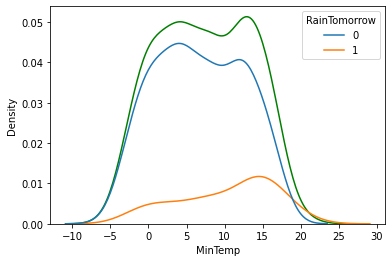

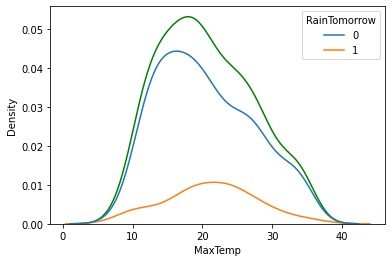

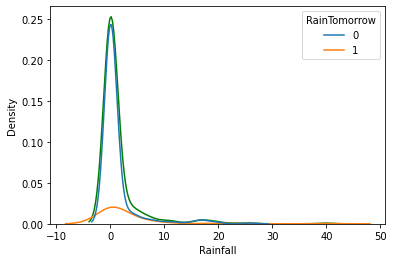

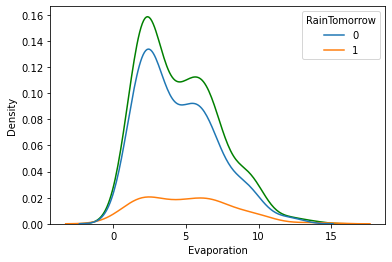

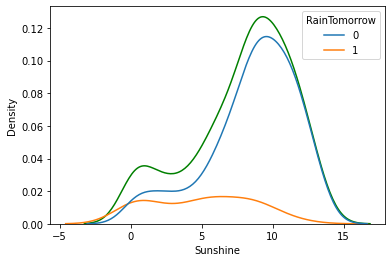

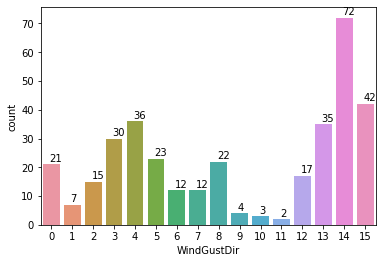

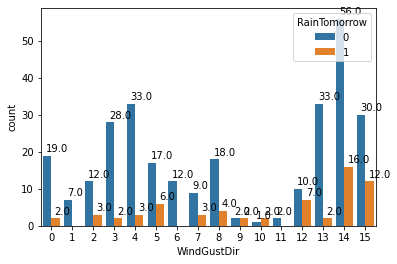

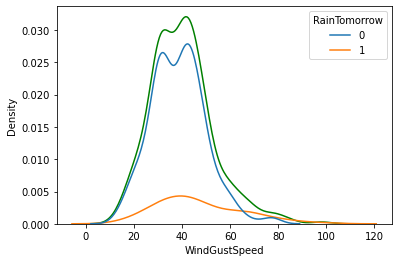

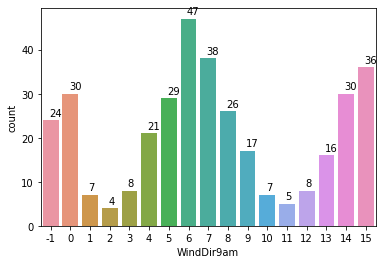

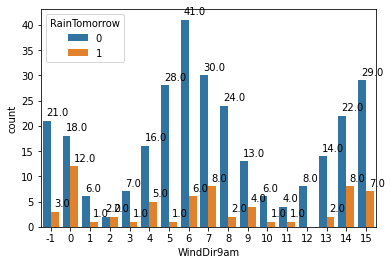

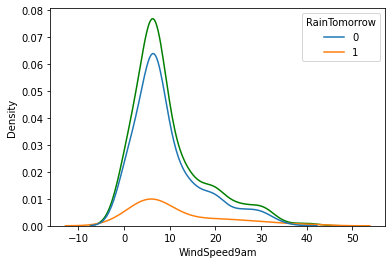

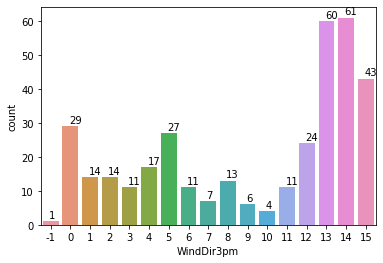

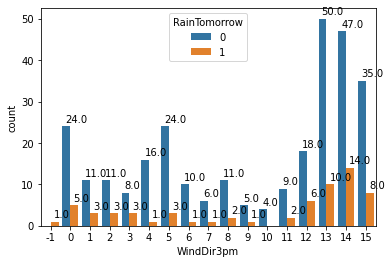

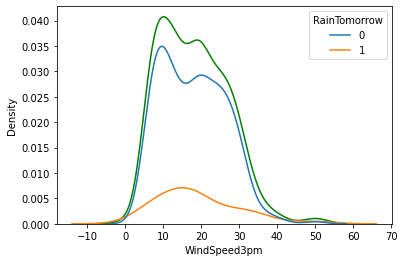

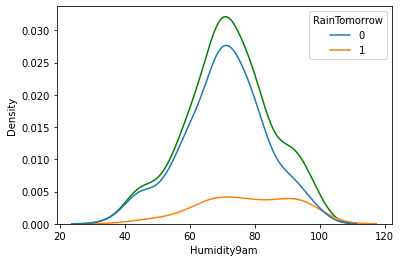

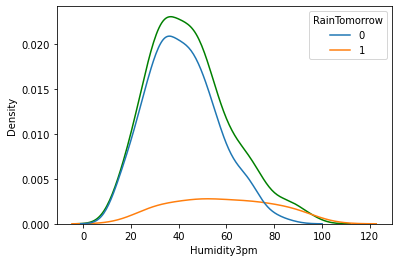

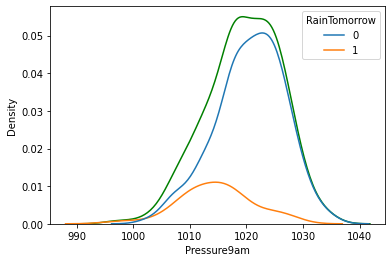

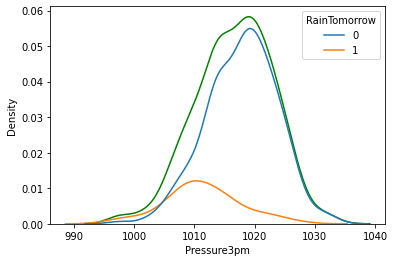

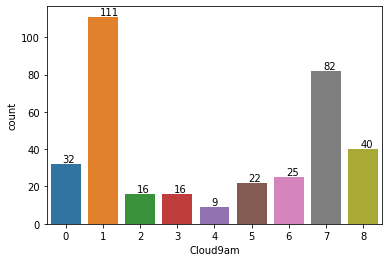

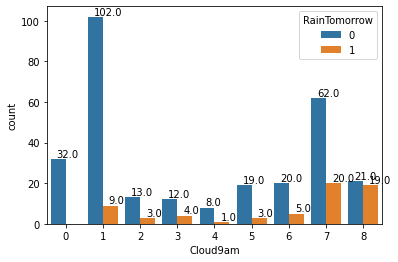

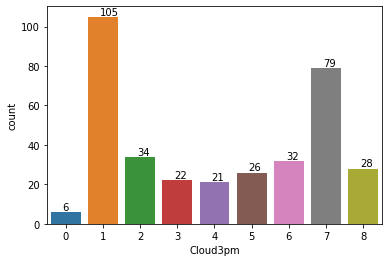

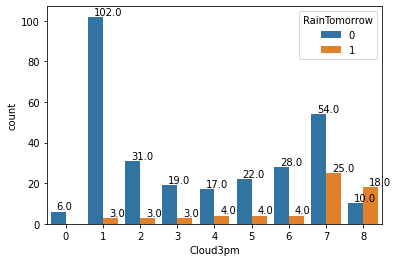

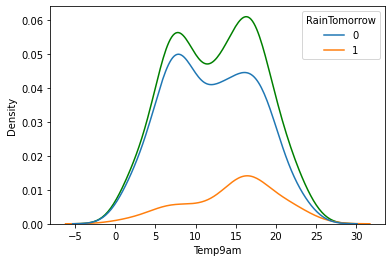

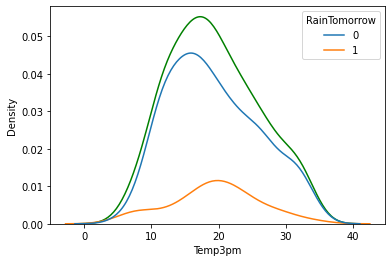

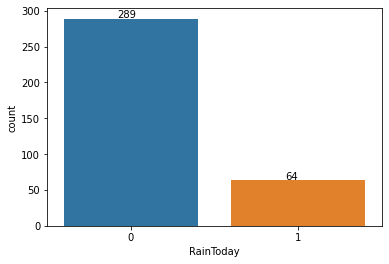

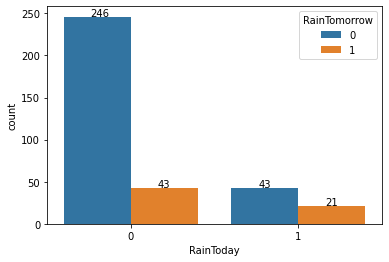

In [ ]:
feature_list = [
               ('MinTemp', 'cont'),
               ('MaxTemp', 'cont'),
               ('Rainfall', 'cont'),
               ('Evaporation', 'cont'),
               ('Sunshine', 'cont'),
               ('WindGustDir', 'object'),
               ('WindGustSpeed', 'cont'),
               ('WindDir9am', 'object'),
               ('WindSpeed9am', 'cont'),
               ('WindDir3pm', 'object'),
               ('WindSpeed3pm', 'cont'),
               ('Humidity9am', 'cont'),
               ('Humidity3pm', 'cont'),
               ('Pressure9am', 'cont'),
               ('Pressure3pm', 'cont'),
               ('Cloud9am', 'object'),
               ('Cloud3pm', 'object'),
               ('Temp9am', 'cont'),
               ('Temp3pm', 'cont'),
               ('RainToday', 'object')

]
for x in feature_list:
  if(x[1] == 'object'):
        plot_bar_chart(x[0], weatherClean)
  if(x[1] == 'cont'):
      plot_dist_chart(x[0], weatherClean)

### Visualise cleaned dataset with imputed values

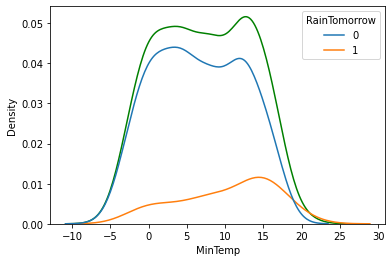

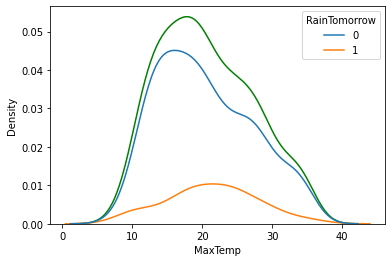

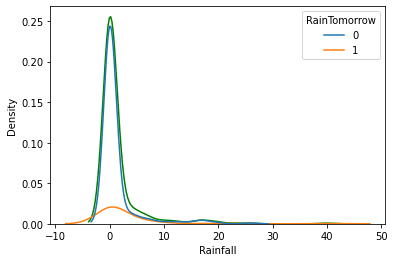

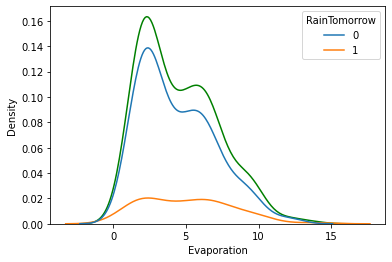

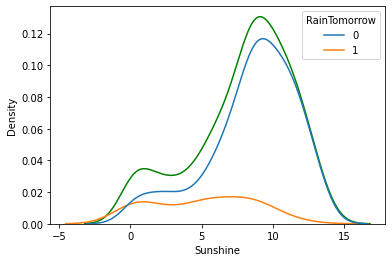

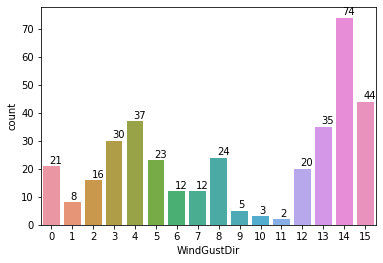

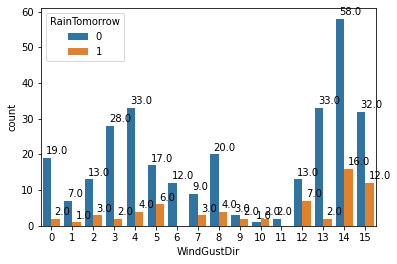

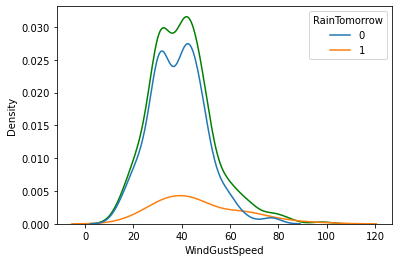

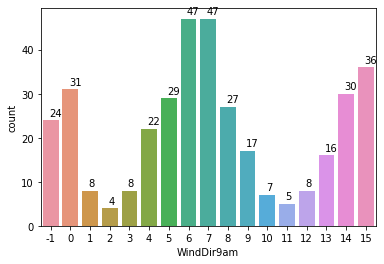

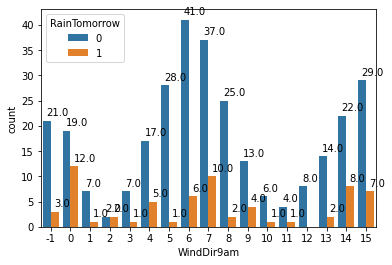

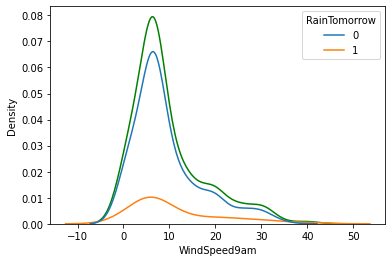

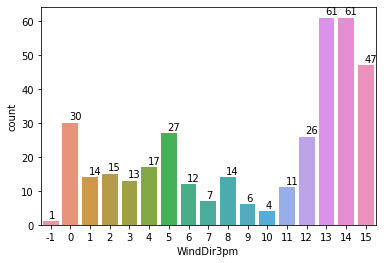

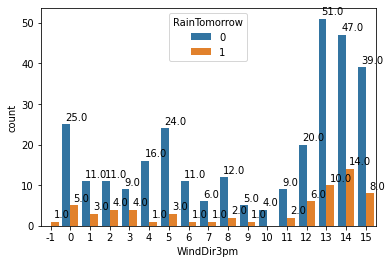

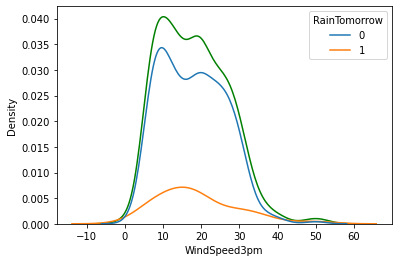

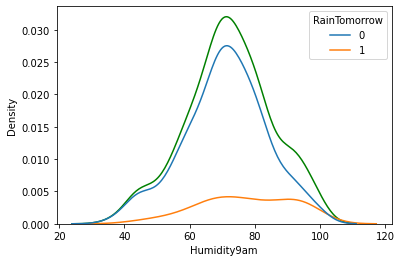

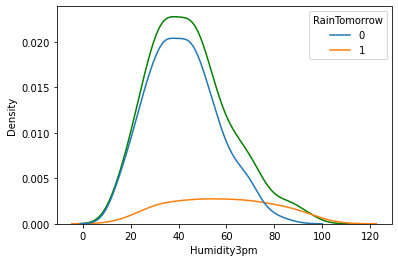

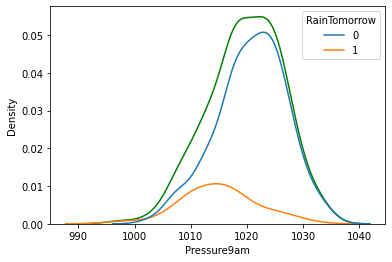

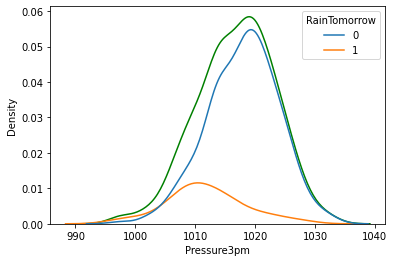

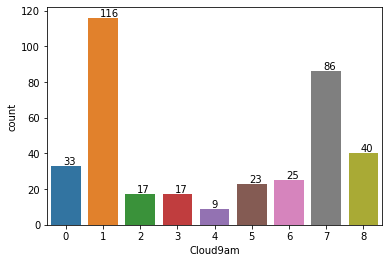

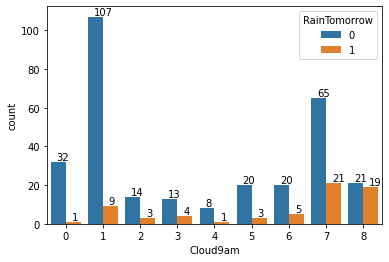

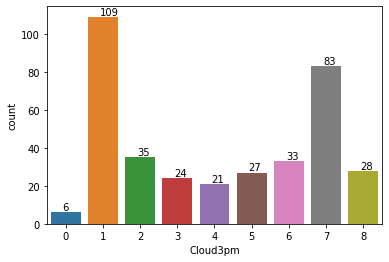

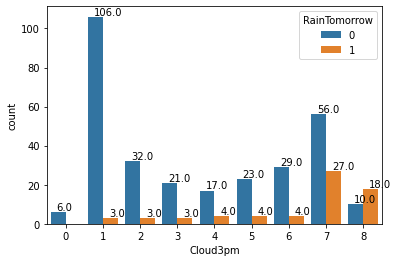

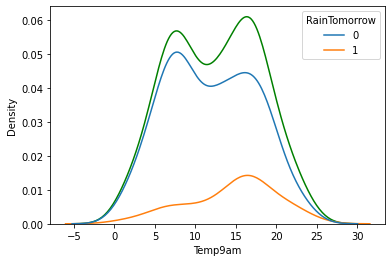

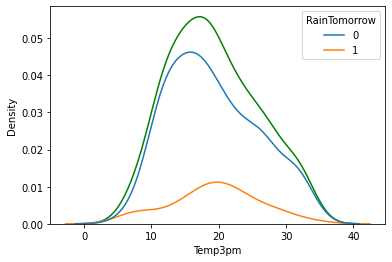

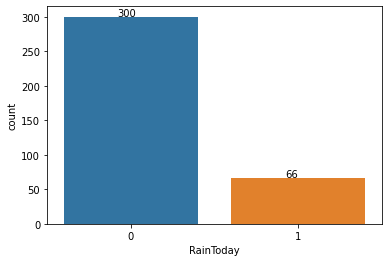

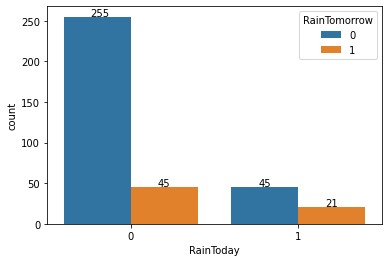

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3           14   
1       14.0     26.9       3.6          4.4       9.7            3   
2       13.7     23.4       3.6          5.8       3.3           14   
3       13.3     15.5      39.8          7.2       9.1           14   
4        7.6     16.1       2.8          5.6      10.6            7   
..       ...      ...       ...          ...       ...          ...   
247     -0.1     14.2       0.0          1.4       7.0           12   
257     -1.7     13.6       0.0          1.8       5.2           15   
271      0.8     12.2       0.0          1.8       8.6            8   
300     -3.3     15.1       0.0          3.0       8.7            9   
348     11.9     21.1      13.2          6.6       8.7           14   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0          10          14           6.0  ...           29   
1             39.0           4          12           4.0  ...           36   
2             85.0           0           1           6.0  ...           69   
3             54.0          13          12          30.0  ...           56   
4             50.0           7           5          20.0  ...           49   
..             ...         ...         ...           ...  ...          ...   
247           13.0           7          13           7.0  ...           55   
257           28.0           7          15           7.0  ...           46   
271           48.0           8           8          19.0  ...           49   
300           30.0           7           6           9.0  ...           23   
348           41.0           1           0           7.0  ...           61   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0         1019.7       1015.0         7         7     14.4     23.6   
1         1012.4       1008.4         5         3     17.5     25.7   
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
4         1018.3       1018.5         7         7     11.1     15.4   
..           ...          ...       ...       ...      ...      ...   
247       1032.9       1028.9         1         2      4.7     12.6   
257       1023.0       1020.1         1         7      3.9     13.3   
271       1020.9       1016.8         3         1      6.5     11.2   
300       1027.7       1025.5         1         1      7.9     14.4   
348       1019.2       1016.7         7         3     14.5     19.4   

     RainToday  RISK_MM  RainTomorrow  
0            0      3.6             1  
1            1      3.6             1  
2            1     39.8             1  
3            1      2.8             1  
4            1      0.0             0  
..         ...      ...           ...  
247          0      0.0             0  
257          0      0.2             0  
271          0      0.0             0  
300          0      0.0             0  
348          1      0.6             0  

[366 rows x 22 columns]

In [ ]:
weatherAddImpute = pd.concat([weatherClean, weatherImpute])
for x in feature_list:
  if(x[1] == 'object'):
        plot_bar_chart(x[0], weatherAddImpute)
  if(x[1] == 'cont'):
      plot_dist_chart(x[0], weatherAddImpute)

weatherAddImpute

## Split test/train data
- Train/Test approx. 80/20 split. (apprx. because imputed data will be added to training set after using clean data to split)
- Cross validation on training set
- Separate out test data set

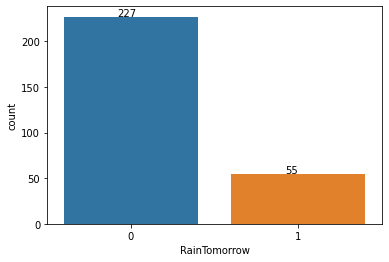

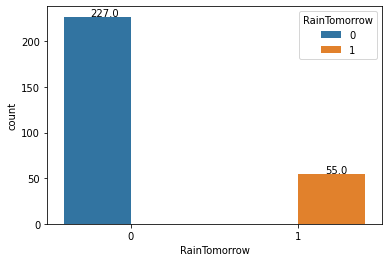

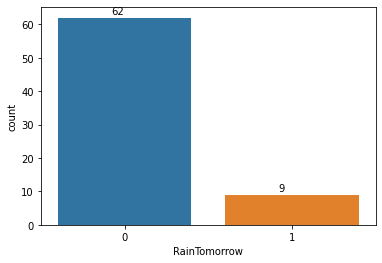

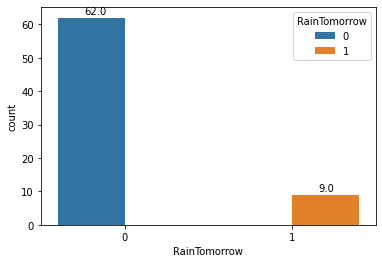

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0       6.1     18.2       0.2          4.2       8.4            6   
1      12.8     24.9       0.0          2.4       6.2            3   
2      -0.9     16.7       0.0          2.8       8.6           14   
3       8.7     13.0       0.6          3.2       7.1           13   
4      18.0     34.9       0.0          9.2       9.9           14   
..      ...      ...       ...          ...       ...          ...   
66      2.1     10.7       0.0          3.4       9.4           14   
67      5.6     18.0       5.2          3.8       9.3            8   
68      9.8     14.4       0.8          0.6       0.0            5   
69      2.3     16.8       0.0          4.8      11.4            0   
70     15.9     23.4       0.0         12.6       2.2            5   

    WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0            43.0           6           5          19.0  ...           63   
1            30.0          15          10           6.0  ...           76   
2            35.0          13          14           7.0  ...           84   
3            54.0          12          13          19.0  ...           82   
4            69.0           0          12           6.0  ...           68   
..            ...         ...         ...           ...  ...          ...   
66           59.0          15          13          28.0  ...           59   
67           31.0           7           7           9.0  ...           70   
68           20.0           8           5           9.0  ...           99   
69           41.0          15          15           6.0  ...           52   
70           50.0           5           5          20.0  ...           69   

    Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            47       1024.6       1022.2         4         6     12.4   
1            44       1023.2       1019.3         7         6     15.5   
2            33       1018.1       1013.9         7         7      6.4   
3            58       1013.7       1014.1         4         2      8.8   
4            29       1018.0       1013.7         1         6     22.2   
..          ...          ...          ...       ...       ...      ...   
66           45       1022.2       1018.2         1         1      6.2   
67           40       1020.8       1019.6         1         1     12.4   
68           86       1028.5       1027.2         8         8     12.1   
69           34       1019.8       1017.0         2         1      9.8   
70           55       1016.8       1016.3         8         7     19.2   

    Temp3pm  RainToday  RainTomorrow  
0      17.3          0             0  
1      24.2          0             0  
2      15.5          0             0  
3      11.1          0             0  
4      33.1          0             1  
..      ...        ...           ...  
66      9.5          0             0  
67     17.9          1             0  
68     13.6          0             1  
69     16.3          0             0  
70     22.3          0             0  

[71 rows x 21 columns]

In [ ]:
from sklearn.model_selection import train_test_split

x = weatherClean.iloc[:, :-2] # RISK_MM is on position -2.
y = weatherClean.iloc[:, -1]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2,random_state=0)
train_impute = weatherImpute.drop(columns = 'RISK_MM')

train = train_x.merge(train_y, on=train_y.index).drop(columns='key_0')
test = test_x.merge(test_y, on=test_y.index).drop(columns='key_0')
plot_bar_chart('RainTomorrow', train)
plot_bar_chart('RainTomorrow', test)
test

## Fixing the imbalanced data set for training
Note: How to deal with imbalanced dataset (also refer to slides)
- https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
- Oversample the rain-yes classes?
- Undersampling would leave with too few observations.
- Maybe somewhere in the middle? No. Too few.

**Only the training set needs to be oversampled.
Make sure assesment is by macro. Refresher on macro/micro/weighted below
- https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

!! DO NOT PERFORM OVERSAMPLING WITH NaN VALUES OR GUESSED VALUES INCLUDED !!
Issue: upsampling imputed data
- Any substituted values must be excluded from the dataset prior to performing oversampling to avoid magnifying the bias introduced by predicted values.
- Currently under check to see if this is significant
- https://www.reddit.com/r/MachineLearning/comments/4edh2n/upsampling_with_missing_values/


Oversampling
- resample()
- SMOTE

### Get number of new RainTomorrow = 1 rows to generate.

In [ ]:
oversampleCount = train_y.value_counts()[0] + imputeCountNo - imputeCountYes
oversampleCount 

236

### Resample
- https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
- Resample duplicates the minority data.


#### Do not include imputed data

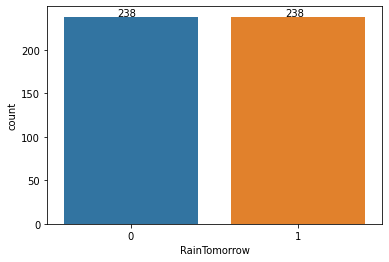

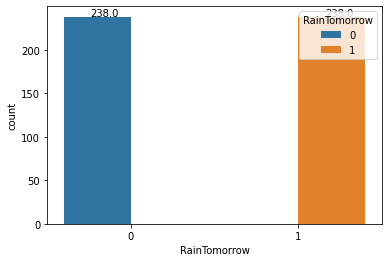

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
train1 = train.copy()
df_majority1 = train1[(train['RainTomorrow']==0)] 
df_minority1 = train1[(train['RainTomorrow']==1)] 
# upsample minority class
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,    # sample with replacement
                                 n_samples= oversampleCount,  # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled1 = pd.concat([df_minority_upsampled1, df_majority1])



df_upsampled1 = pd.concat([df_upsampled1, train_impute]) # add data from weatherImpute
df_upsampled1.reset_index(inplace=True)
df_upsampled1 = df_upsampled1.drop(columns=['index'])

plot_bar_chart('RainTomorrow', df_upsampled1)

Visualise resampled data

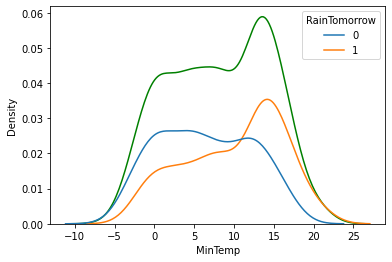

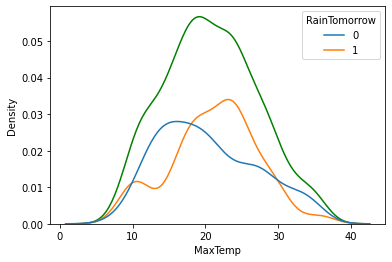

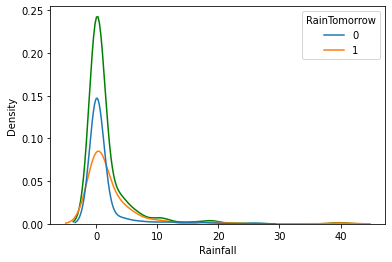

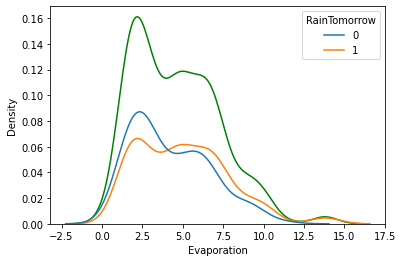

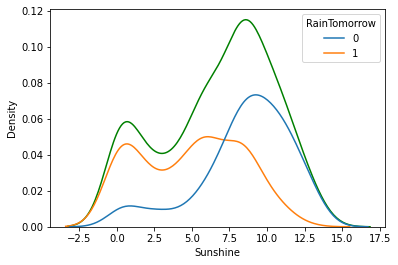

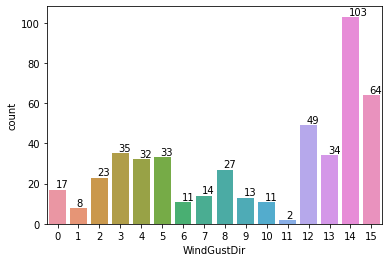

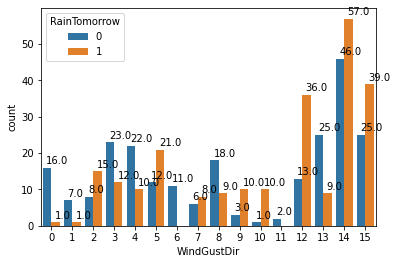

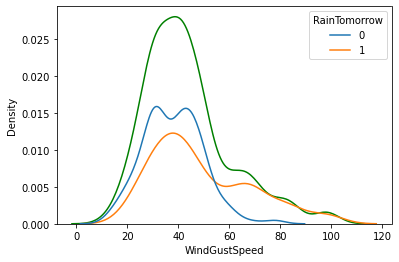

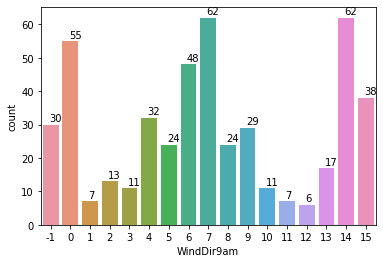

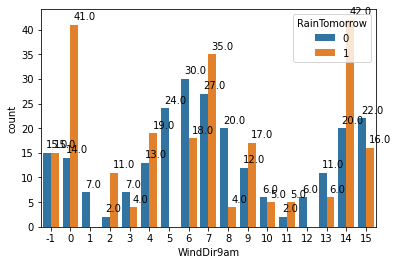

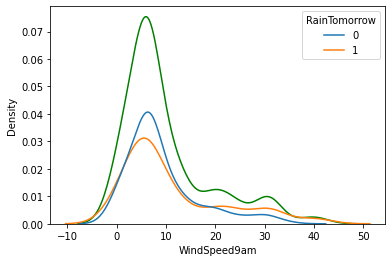

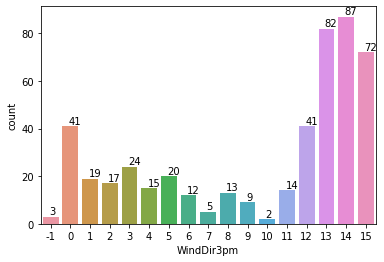

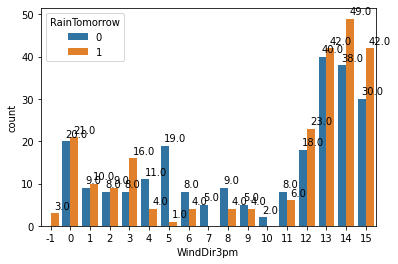

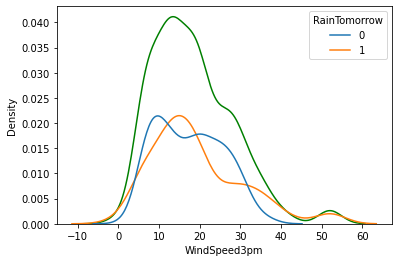

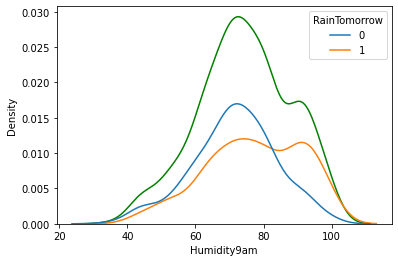

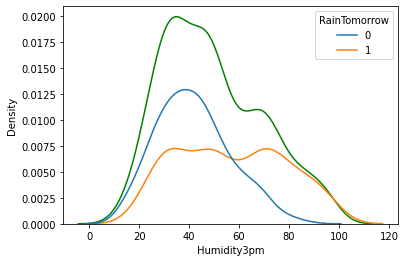

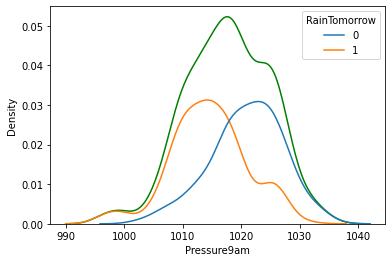

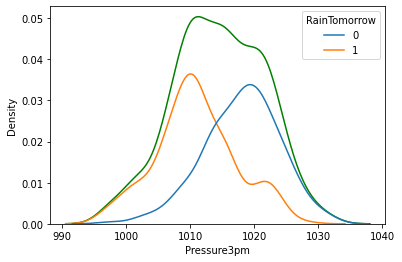

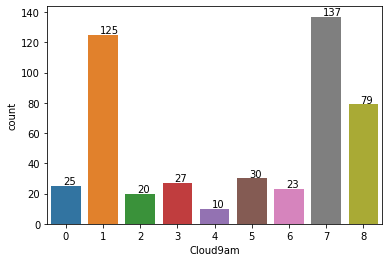

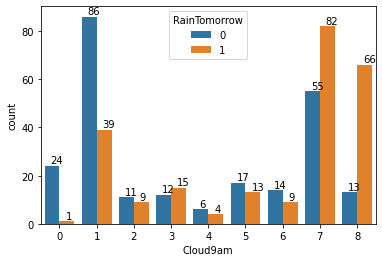

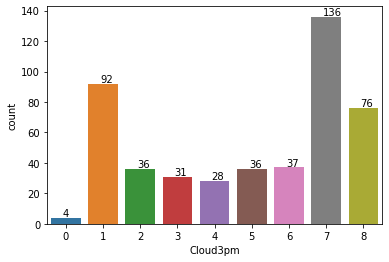

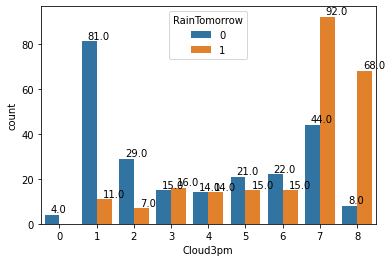

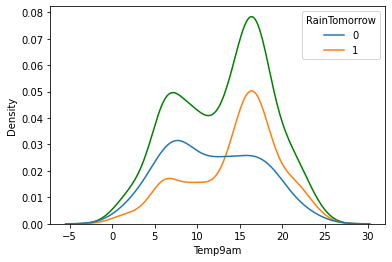

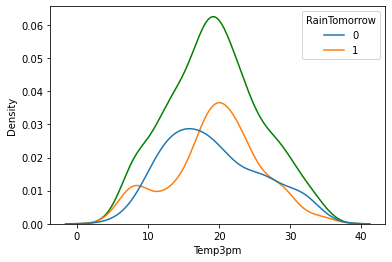

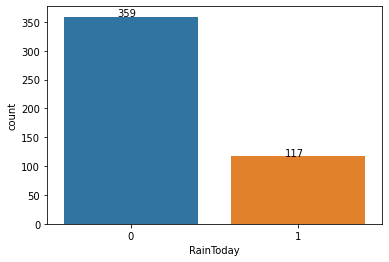

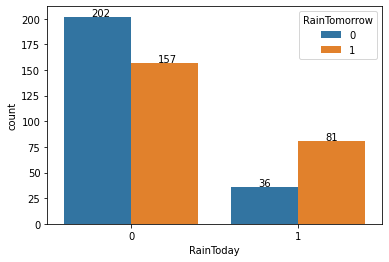

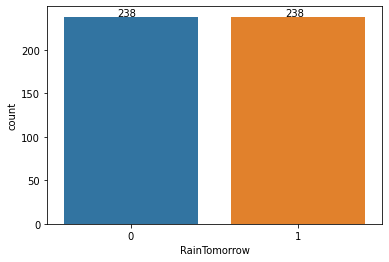

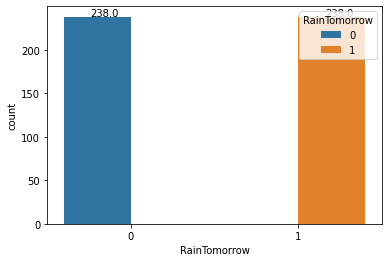

In [ ]:
for x in feature_list:
  if(x[1] == 'object'):
        plot_bar_chart(x[0], df_upsampled1)
  if(x[1] == 'cont'):
      plot_dist_chart(x[0], df_upsampled1)
plot_bar_chart('RainTomorrow', df_upsampled1)

#### Include imputed data

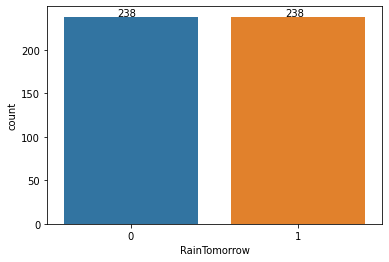

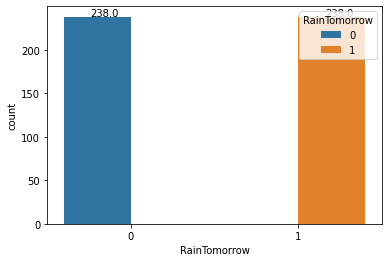

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
train2 = pd.concat([train, train_impute]) # add data from weather impute
df_majority2 = train2[(train2['RainTomorrow']==0)] 
df_minority2 = train2[(train2['RainTomorrow']==1)] 
# upsample minority class
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority2.shape[0],  # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled2 = pd.concat([df_minority_upsampled2, df_majority2])

df_upsampled2.reset_index(inplace=True)
df_upsampled2 = df_upsampled2.drop(columns=['index'])

plot_bar_chart('RainTomorrow', df_upsampled2)

Visualise resampled data

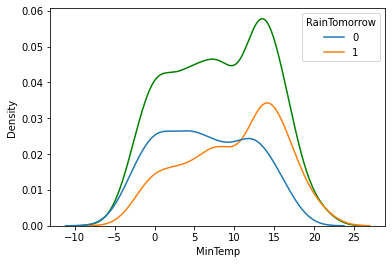

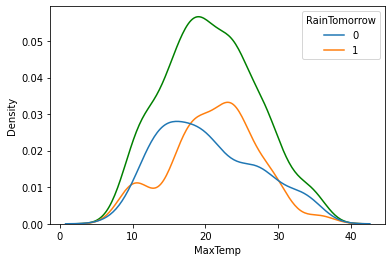

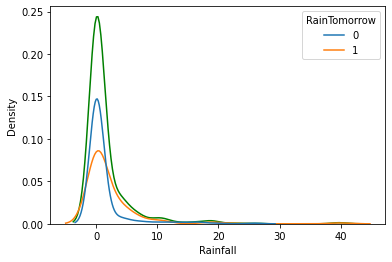

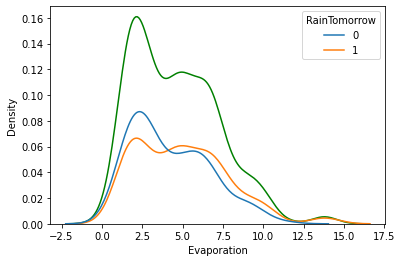

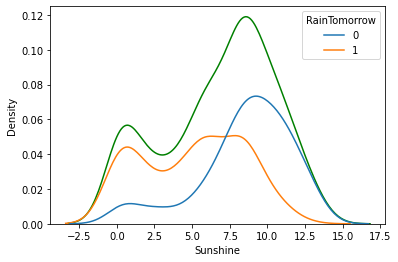

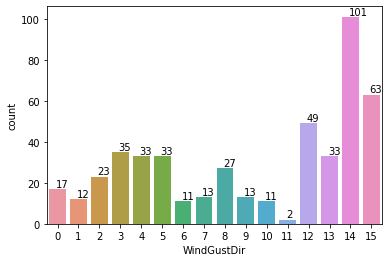

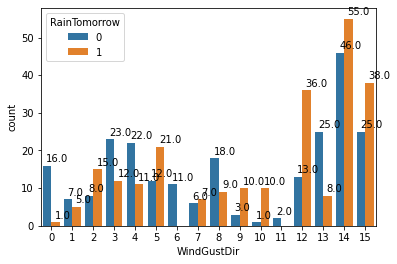

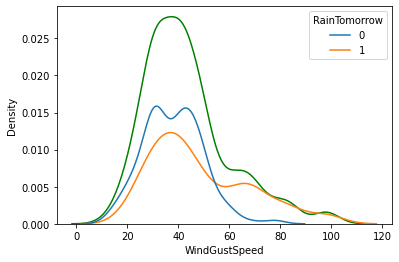

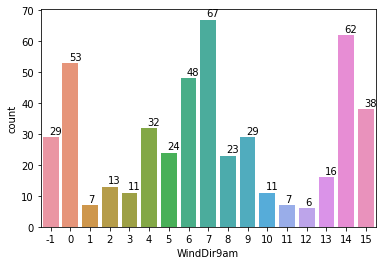

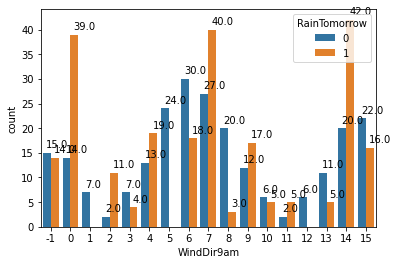

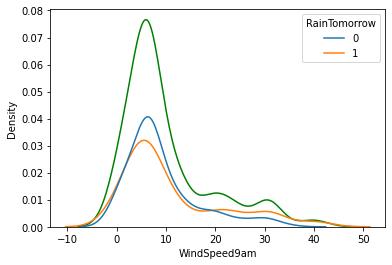

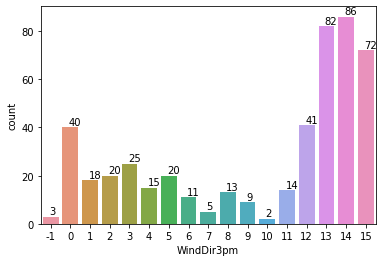

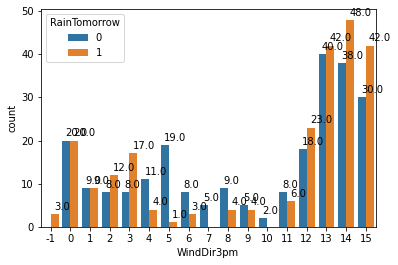

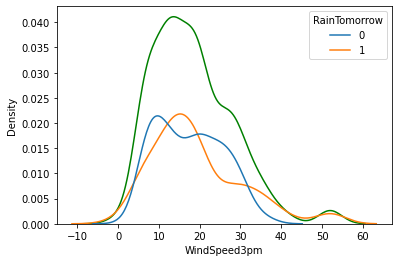

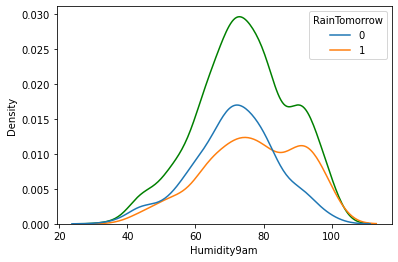

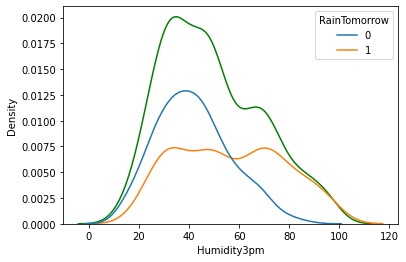

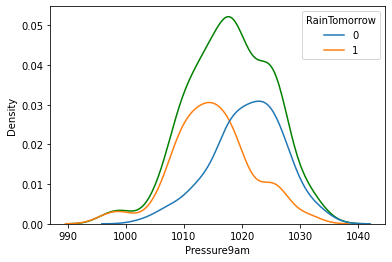

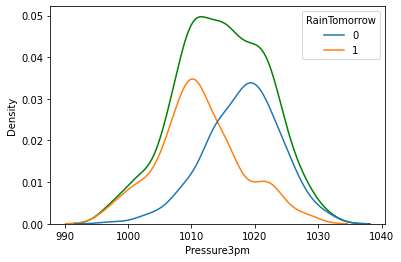

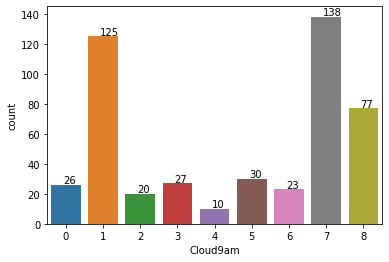

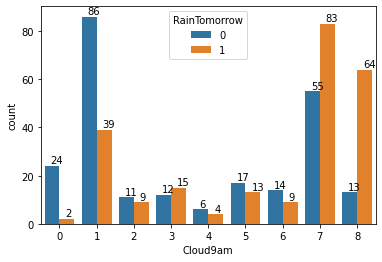

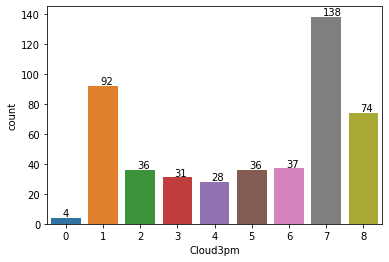

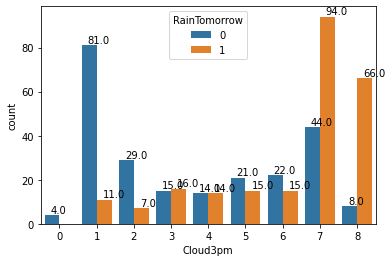

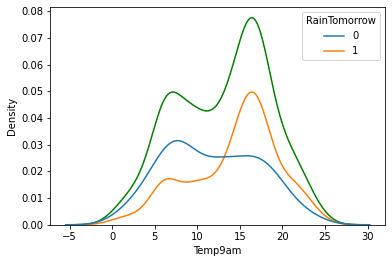

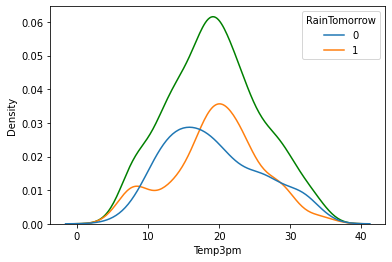

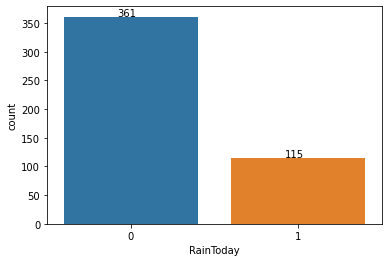

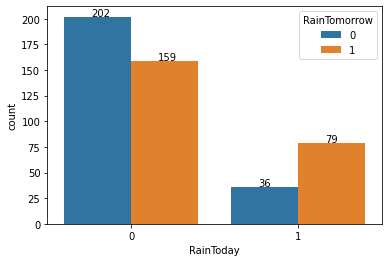

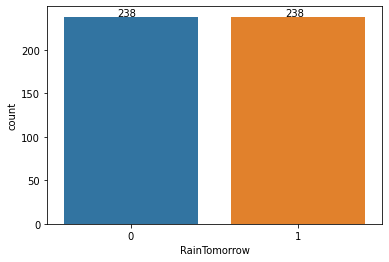

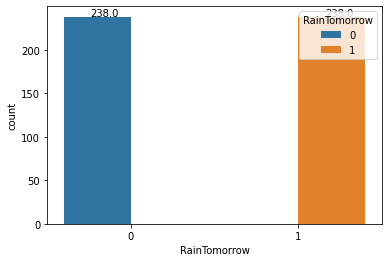

In [ ]:
for x in feature_list:
  if(x[1] == 'object'):
        plot_bar_chart(x[0], df_upsampled2)
  if(x[1] == 'cont'):
      plot_dist_chart(x[0], df_upsampled2)
plot_bar_chart('RainTomorrow', df_upsampled2)

#### Conclusion
Should resample while including imputed data. There seems to be not too much difference between resampling with imputed vs resampling without imputed. Crucially Sunshine (and one more, check) data becomes skewed without including imputed data.

### SMOTE
- https://github.com/scikit-learn-contrib/imbalanced-learn
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html?highlight=smote#imblearn.over_sampling.SMOTE 

#### Do not include imputed data

In [ ]:
imputePlaceholderCount =  imputeCountNo - imputeCountYes
imputePlaceholderCount

9

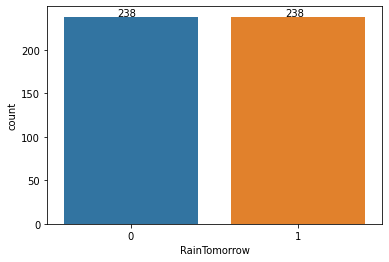

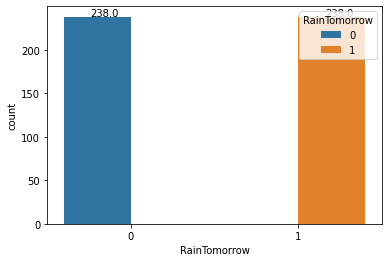

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        8.7     19.7       1.6          5.2       8.0           14   
1       13.1     17.4       6.4          2.8       0.0           15   
2       16.4     19.4       0.4          9.2       0.0            4   
3       15.5     22.4       0.6          4.8       1.9           14   
4       12.6     23.1       3.4          1.6       2.3           15   
..       ...      ...       ...          ...       ...          ...   
471      1.8      8.7       0.0          1.8       1.2           14   
472     20.9     35.7       0.0         13.8       6.9           10   
473      3.2     21.9       0.0          6.8       5.2           14   
474      6.1     17.2       4.0          2.2       2.4           14   
475     14.8     17.3       0.0          7.6       0.8            7   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0             98.0          14          15          31.0  ...           63   
1             43.0           0           0          11.0  ...           94   
2             26.0           3           4           6.0  ...           88   
3             28.0           7          13           6.0  ...           89   
4             30.0           0          14           4.0  ...           97   
..             ...         ...         ...           ...  ...          ...   
471           65.0          14          14          31.0  ...           83   
472           50.0           4          13           4.0  ...           61   
473           80.0           7          14           2.0  ...           51   
474           59.0          14          13          24.0  ...           89   
475           48.0           8           6          13.0  ...           74   

     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0             33       1009.1       1001.5         3         6     15.6   
1             93       1010.2       1006.5         8         8     16.4   
2             72       1010.7       1008.9         8         8     16.5   
3             68       1018.7       1015.4         8         7     17.1   
4             74       1015.8       1014.1         8         7     15.3   
..           ...          ...          ...       ...       ...      ...   
471           85       1014.6       1010.5         7         7      6.0   
472           28       1007.6       1003.0         7         2     23.6   
473           50       1012.1       1006.5         1         8     15.9   
474           85       1011.2       1010.4         7         7     13.5   
475           78       1010.0       1009.9         7         7     15.7   

     Temp3pm  RainToday  RainTomorrow  
0       18.5          1             1  
1       16.6          1             1  
2       18.3          0             1  
3       21.1          0             1  
4       20.4          1             1  
..       ...        ...           ...  
471      6.9          0             1  
472     34.0          0             1  
473     21.0          0             1  
474     12.6          1             1  
475     15.3          0             1  

[476 rows x 21 columns]

In [ ]:
from imblearn.over_sampling import SMOTE

train1 = train.copy()


train_x1 = pd.concat([train1[train1['RainTomorrow'] == 1].iloc[:-imputePlaceholderCount, :-1], train1[train1['RainTomorrow'] == 0].iloc[:, :-1]])
train_y1 = pd.concat([train1[train1['RainTomorrow'] == 1].iloc[:-imputePlaceholderCount, -1], train1[train1['RainTomorrow'] == 0].iloc[:, -1]])

imputePlaceholder1 = train1[train1['RainTomorrow'] == 1].iloc[-imputePlaceholderCount:, :]
imputePlaceholder1.index = list(imputePlaceholder1.index)

oversample1 = SMOTE()
oversampleX1, oversampleY1 =  oversample1.fit_resample(train_x1, train_y1)
oversampleY1 = oversampleY1.to_frame()
oversampleY1.index = list(oversampleY1.index)

trainOversample1 = oversampleX1.merge(oversampleY1, on=oversampleY1.index)
trainOversample1 = pd.concat([trainOversample1, train_impute, imputePlaceholder1])
trainOversample1.reset_index(inplace=True)
trainOversample1.drop(columns=['index', 'key_0'], inplace=True)

plot_bar_chart('RainTomorrow', trainOversample1)

trainOversample1

Visualise data

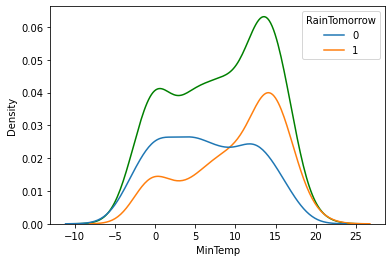

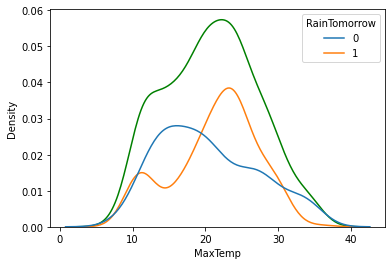

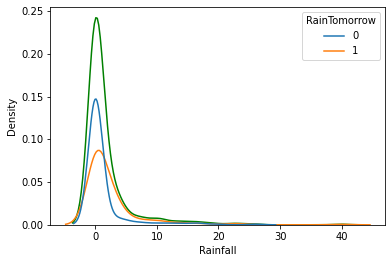

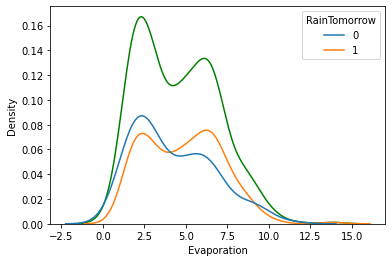

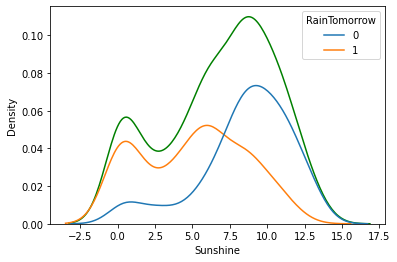

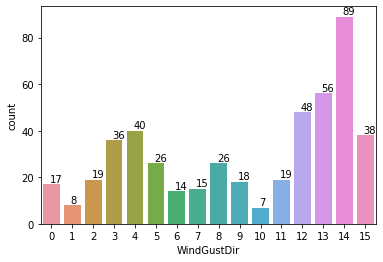

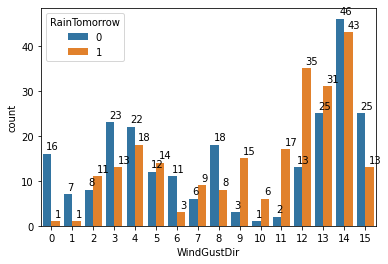

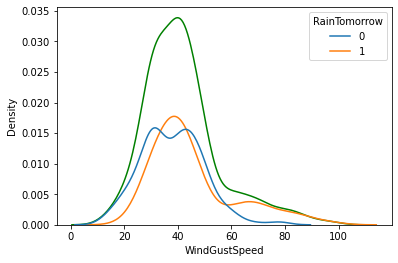

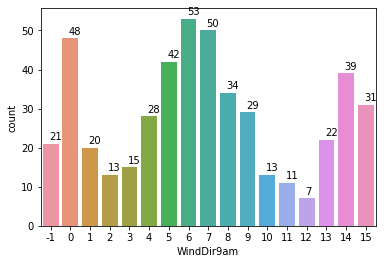

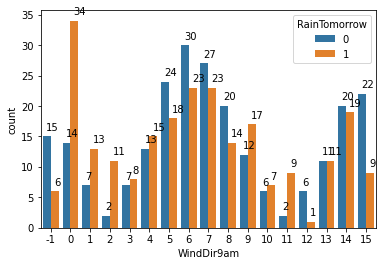

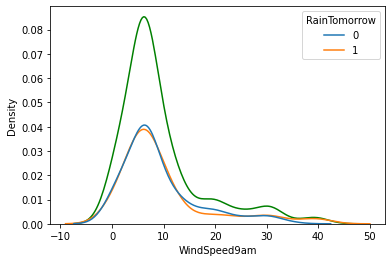

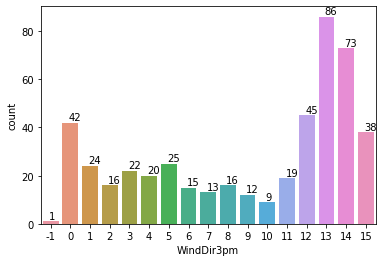

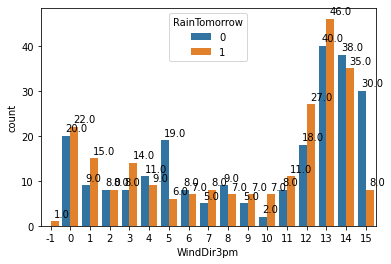

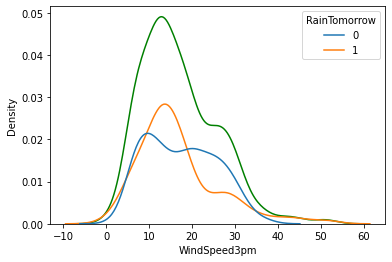

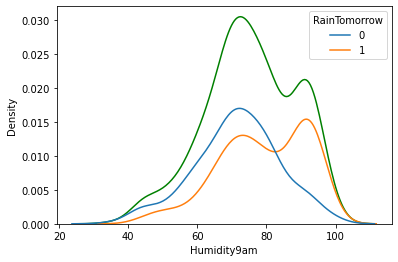

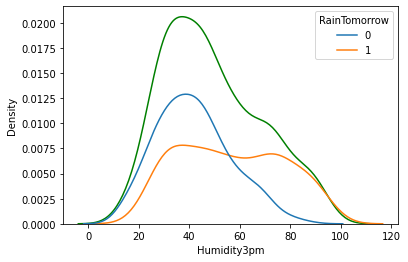

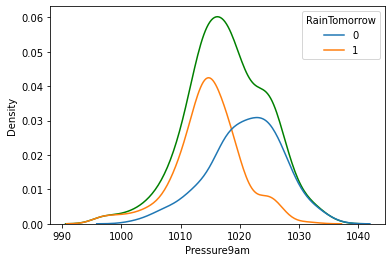

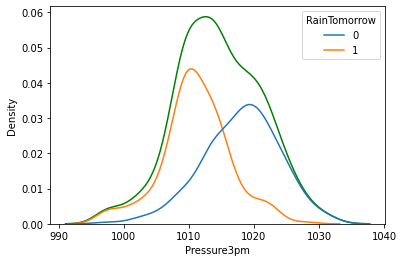

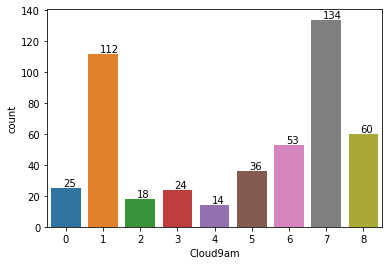

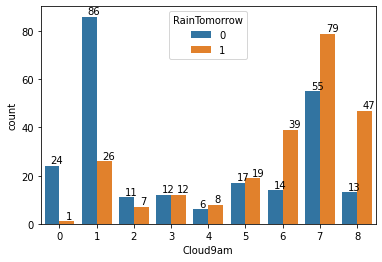

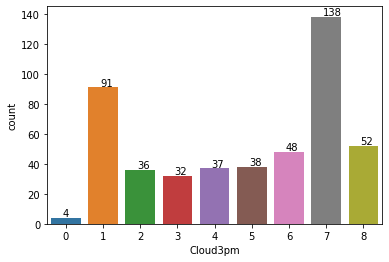

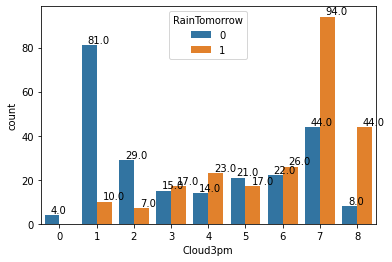

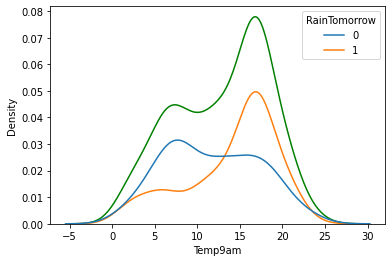

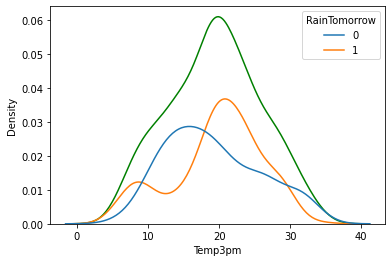

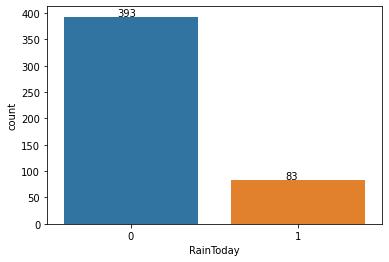

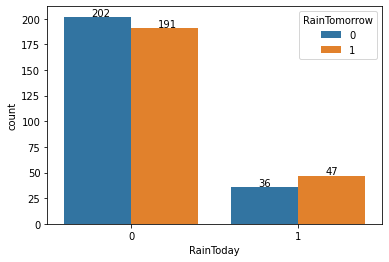

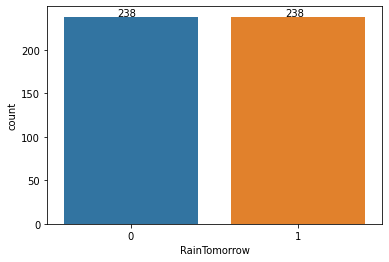

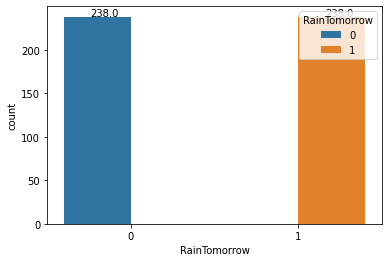

In [ ]:
for x in feature_list:
  if(x[1] == 'object'):
        plot_bar_chart(x[0], trainOversample1)
  if(x[1] == 'cont'):
      plot_dist_chart(x[0], trainOversample1)
plot_bar_chart('RainTomorrow', trainOversample1)

#### Include imputed data

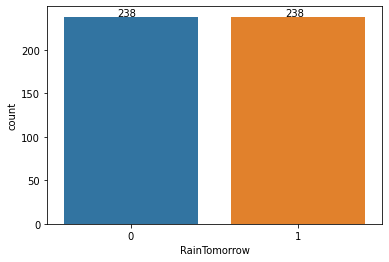

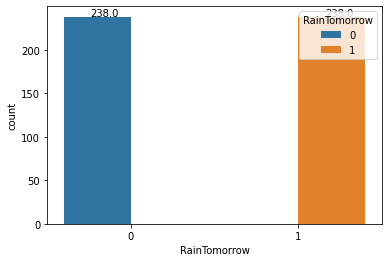

MinTemp    MaxTemp   Rainfall  Evaporation   Sunshine  WindGustDir  \
0    -3.500000  11.200000   0.000000     1.600000   7.700000            5   
1    -3.700000  14.700000   0.000000     3.400000  10.900000            7   
2     8.700000  19.700000   1.600000     5.200000   8.000000           14   
3     4.500000  23.900000   0.000000     4.800000  11.700000           14   
4    13.100000  17.400000   6.400000     2.800000   0.000000           15   
..         ...        ...        ...          ...        ...          ...   
471  -1.950185  10.749444   0.000000     1.749815   3.911435            7   
472  13.977591  25.800443   0.000000     5.122851   7.281412            5   
473  15.176713  20.093149  21.142457     3.397266   0.123287            5   
474   2.087174  19.220973   0.000000     4.986505   5.694590           13   
475  11.567299  28.547972   0.000000     7.009318   8.045988            5   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0        26.000000           0           5      6.000000  ...           76   
1        43.000000           6           0      9.000000  ...           53   
2        98.000000          14          15     31.000000  ...           63   
3        30.000000           3          15      4.000000  ...           67   
4        43.000000           0           0     11.000000  ...           94   
..             ...         ...         ...           ...  ...          ...   
471      47.239815           0           9      0.752778  ...           79   
472      48.000000           5           4     12.761938  ...           68   
473      37.931489           5           5      7.150692  ...           85   
474      75.878421           9          14     10.243159  ...           51   
475      38.706644           7          13      2.293356  ...           77   

     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am  \
0             48  1033.500000  1031.100000         1         5   3.600000   
1             25  1025.800000  1020.900000         0         0   5.500000   
2             33  1009.100000  1001.500000         3         6  15.600000   
3             27  1025.800000  1021.500000         0         4  12.600000   
4             93  1010.200000  1006.500000         8         8  16.400000   
..           ...          ...          ...       ...       ...        ...   
471           71  1019.921759  1018.045741         3         7   4.935417   
472           41  1020.236222  1016.524319         6         7  18.840927   
473           89  1012.583547  1010.993132         8         8  17.383564   
474           57  1014.202006  1008.024984         1         7  13.344621   
475           31  1012.713374  1009.591372         2         6  16.967299   

       Temp3pm  RainToday  RainTomorrow  
0    10.100000          0             0  
1    13.400000          0             0  
2    18.500000          1             1  
3    22.300000          0             0  
4    16.600000          1             1  
..         ...        ...           ...  
471   7.275278          0             1  
472  25.262823          0             1  
473  17.182197          1             1  
474  17.661521          0             1  
475  28.240638          0             1  

[476 rows x 21 columns]

In [ ]:
from imblearn.over_sampling import SMOTE

train2 = train.copy()


train_x2 = pd.concat([train2.iloc[:, :-1], train_impute.iloc[:, :-1]])
train_y2 = pd.concat([train2.iloc[:, -1], train_impute.iloc[:, -1]])

oversample2 = SMOTE()
oversampleX2, oversampleY2 =  oversample1.fit_resample(train_x2, train_y2)
oversampleY2 = oversampleY2.to_frame()
oversampleY2.index = list(oversampleY2.index)

trainOversample2 = oversampleX2.merge(oversampleY2, on=oversampleY2.index)
trainOversample2.drop(columns=['key_0'], inplace=True)

plot_bar_chart('RainTomorrow', trainOversample2)

trainOversample2

Visualise data

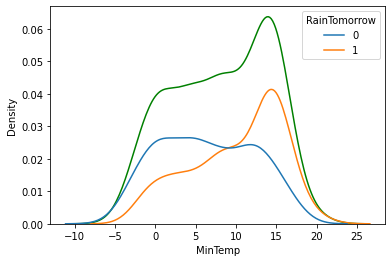

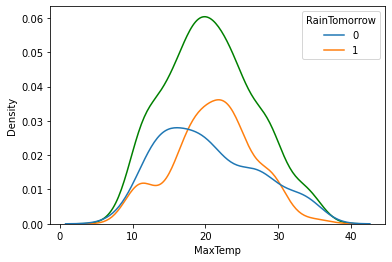

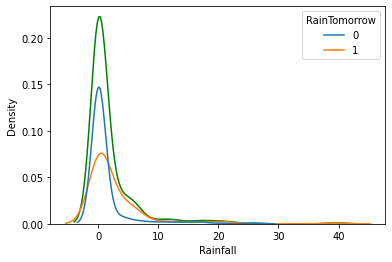

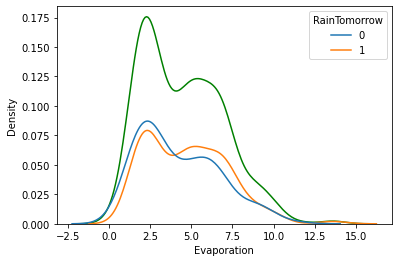

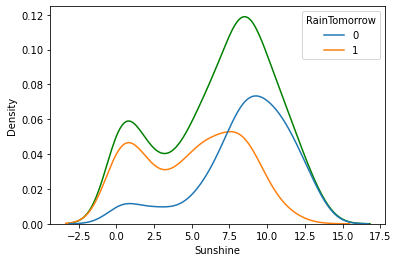

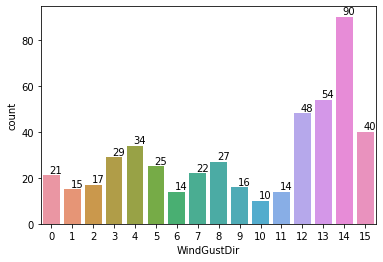

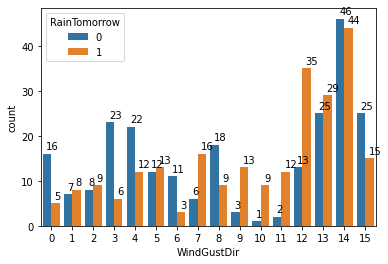

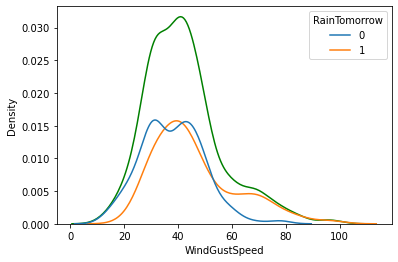

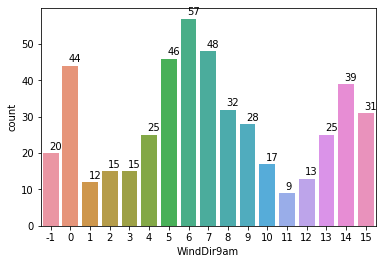

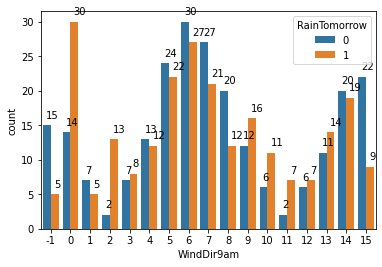

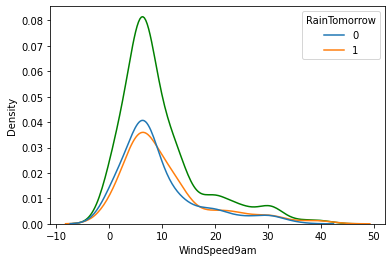

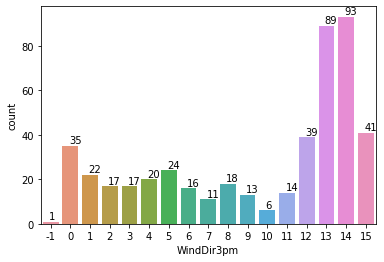

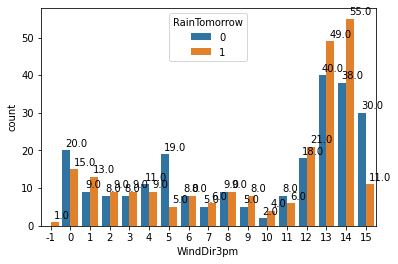

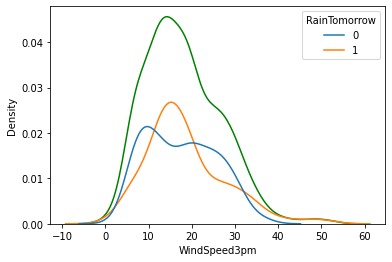

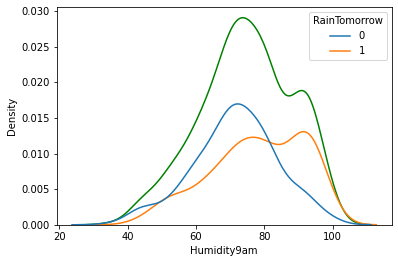

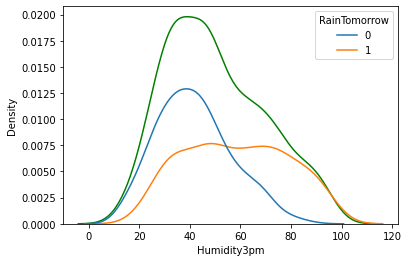

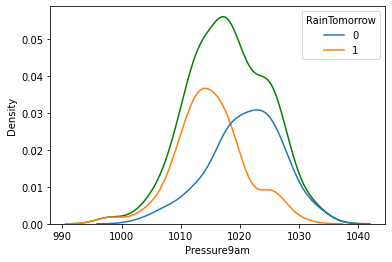

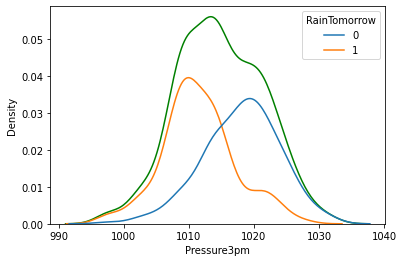

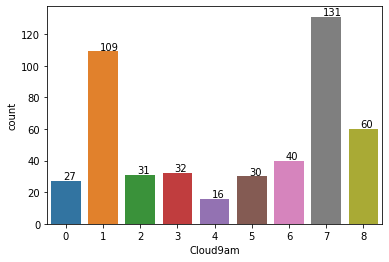

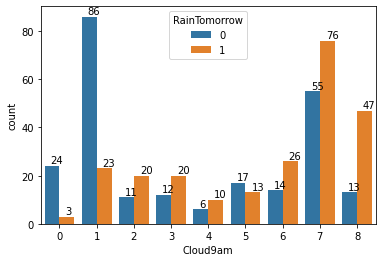

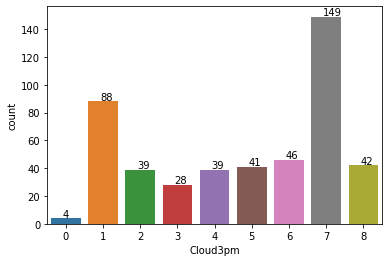

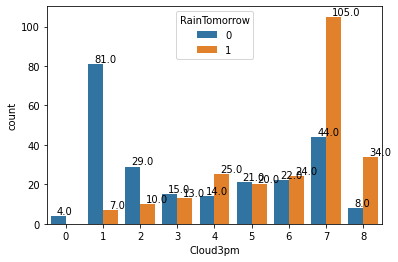

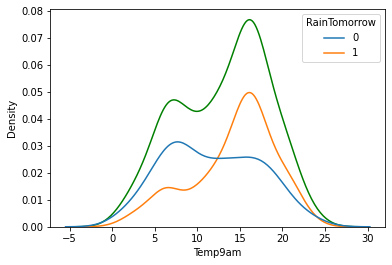

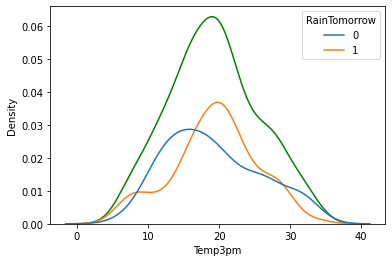

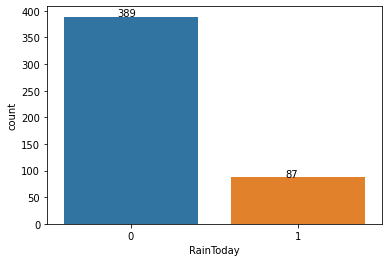

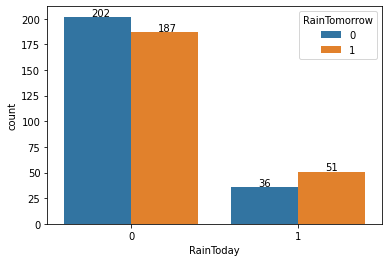

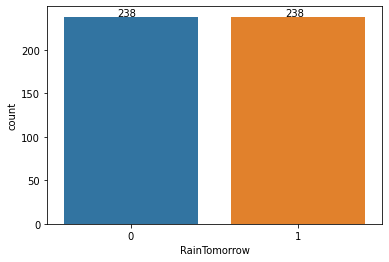

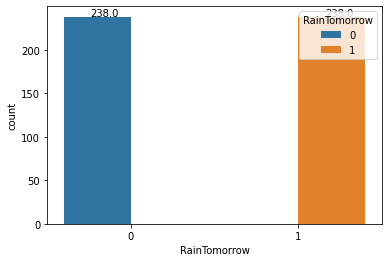

In [ ]:
for x in feature_list:
  if(x[1] == 'object'):
        plot_bar_chart(x[0], trainOversample2)
  if(x[1] == 'cont'):
      plot_dist_chart(x[0], trainOversample2)
plot_bar_chart('RainTomorrow', trainOversample2)

#### Conclusion
Applying SMOTE without including imputed data (and also reserving some rows to make the dataset balanced later) seems to remove too much information, until the generated data is a little skewed. (Compare MinTemp, Sunshine, [may have more])

Apply SMOTE with imputed data for better results.

## Filter/Transform data sets (PCA and observed variant)
Note to self: Remove Rain_MM from feature set (because that's supposed to be the target class for linear classifiers).
(Should be removed during preprocessing)

ENSURE PCA AND DATA PREPROCESSING BLOCK HAS BEEN RUN FIRST!

ENSURE PCA IS NOT RUNNING IN RANKING MODE!



### Observed (with unnecessary var removed)



In [ ]:
discardFeature = list(set(initial_feature_names) - set(keepFeatureList))

# Using resampled data, training set
weatherObserved_trainResample = df_upsampled2.drop(columns=discardFeature)
weatherObserved_trainResample.info()
weatherObserved_trainResample_x = weatherObserved_trainResample.iloc[:, :-1]
weatherObserved_trainResample_y = weatherObserved_trainResample.iloc[:, -1]

# Using SMOTE data, training set
weatherObserved_trainSMOTE = trainOversample2.drop(columns=discardFeature)
weatherObserved_trainSMOTE.info()
weatherObserved_trainSMOTE_x = weatherObserved_trainSMOTE.iloc[:, :-1]
weatherObserved_trainSMOTE_y = weatherObserved_trainSMOTE.iloc[:, -1]

# Test set
weatherObserved_test = test.drop(columns=discardFeature)
weatherObserved_test_x = weatherObserved_test.iloc[:, :-1]
weatherObserved_test_y = weatherObserved_test.iloc[:, -1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        476 non-null    float64
 1   WindGustSpeed  476 non-null    float64
 2   WindDir3pm     476 non-null    int64  
 3   WindSpeed3pm   476 non-null    float64
 4   Humidity9am    476 non-null    int64  
 5   Humidity3pm    476 non-null    int64  
 6   RainTomorrow   476 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 26.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        476 non-null    float64
 1   WindGustSpeed  476 non-null    float64
 2   WindDir3pm     476 non-null    int64  
 3   WindSpeed3pm   476 non-null    float64
 4   Humidity9am    476 non-null    int64  
 5   Humidity3pm    476 non-null    i

Quick visualise

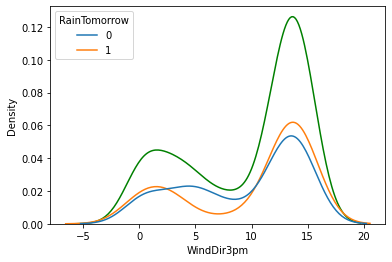

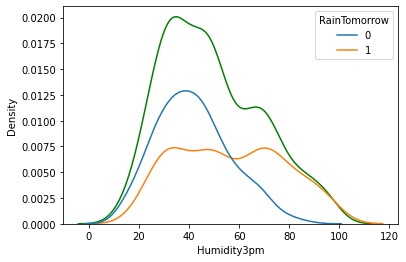

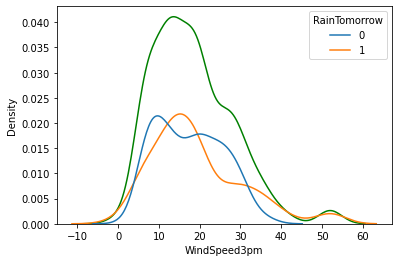

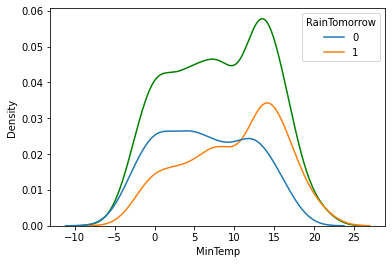

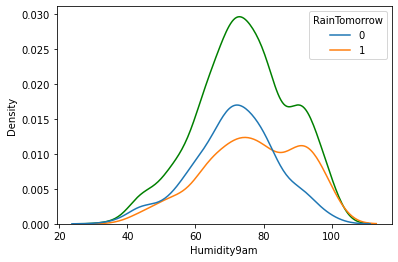

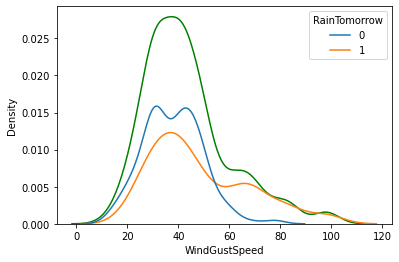

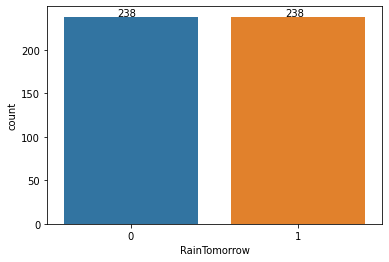

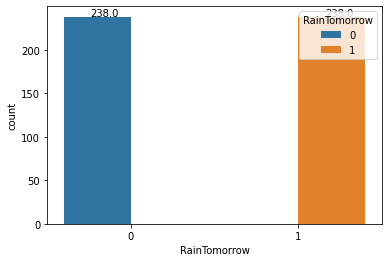

In [ ]:
for x in list(set(keepFeatureList)):
    plot_dist_chart(x, weatherObserved_trainResample)

plot_bar_chart('RainTomorrow', weatherObserved_trainResample)

### PCA transformed

In [ ]:
PCAList = ['PCA0','PCA1','PCA2', 'PCA3','PCA4','PCA5','PCA6']

# Using resample, train data
weatherPCA_trainResample_x = df_upsampled2.iloc[:, :-1]
weatherPCA_trainResample_y = df_upsampled2.iloc[:, -1]

weatherPCA_trainResample_x = pcaBase.transform(weatherPCA_trainResample_x)

weatherPCA_trainResample_x = pd.DataFrame(weatherPCA_trainResample_x, columns = PCAList)
weatherPCA_trainResample_x.index = list(weatherPCA_trainResample_x.index)

weatherPCA_trainResample = weatherPCA_trainResample_x.merge(weatherPCA_trainResample_y, on=weatherPCA_trainResample_x.index).drop(columns='key_0')


# Using SMOTE, train data
weatherPCA_trainSMOTE_x = trainOversample2.iloc[:, :-1]
weatherPCA_trainSMOTE_y = trainOversample2.iloc[:, -1]

weatherPCA_trainSMOTE_x = pcaBase.transform(weatherPCA_trainSMOTE_x)
weatherPCA_trainSMOTE_x = pd.DataFrame(weatherPCA_trainSMOTE_x, columns = PCAList)
weatherPCA_trainSMOTE_x.index = list(weatherPCA_trainSMOTE_x.index)

weatherPCA_trainSMOTE = weatherPCA_trainSMOTE_x.merge(weatherPCA_trainSMOTE_y, on=weatherPCA_trainSMOTE_x.index).drop(columns='key_0')


# Test data
weatherPCA_test_x = test_x
weatherPCA_test_y = test_y

weatherPCA_test_x = pcaBase.transform(weatherPCA_test_x)

weatherPCA_test_x = pd.DataFrame(weatherPCA_test_x, columns = PCAList)
weatherPCA_test_x.index = list(weatherPCA_test_x.index)

weatherPCA_test = weatherPCA_test_x.merge(weatherPCA_test_y, on=weatherPCA_test_x.index).drop(columns='key_0')


Quick visualise

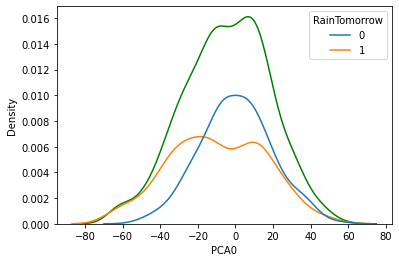

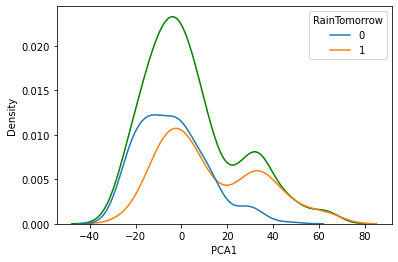

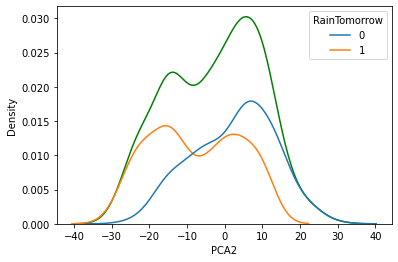

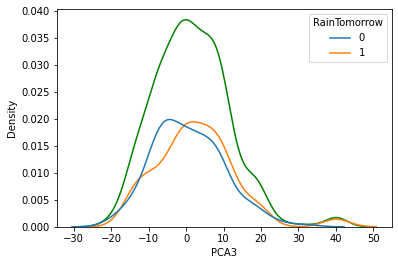

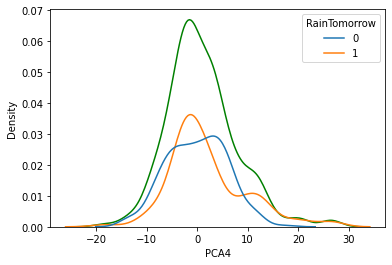

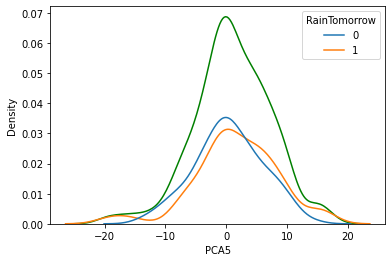

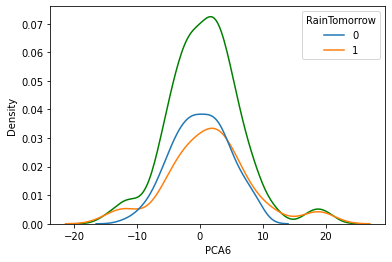

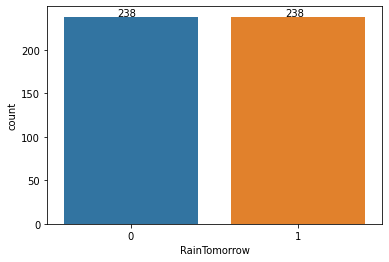

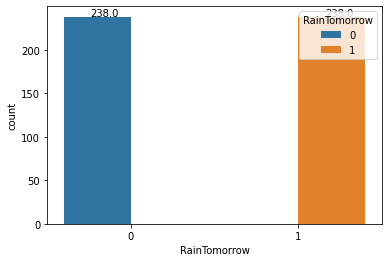

In [ ]:
for x in PCAList:
    plot_dist_chart(x, weatherPCA_trainResample)

plot_bar_chart('RainTomorrow', weatherPCA_trainResample)

Quick peek

In [ ]:
weatherPCA_trainResample

PCA0       PCA1       PCA2       PCA3      PCA4      PCA5  \
0     5.663511   3.249878  -9.339516   3.125007 -5.466962  1.708009   
1    -4.905180  26.814524 -13.150246   2.382295 -7.028709  9.555479   
2   -37.410749  33.330530  -9.396077   2.322535  1.720704 -6.500317   
3    30.240102  63.150830   9.929272  19.185490  8.281194 -3.817168   
4   -28.375225  -1.464355 -15.314431   2.824648 -3.280598  7.333185   
..         ...        ...        ...        ...       ...       ...   
471 -26.667676 -28.727129  11.243640  -5.825472 -4.583540 -1.013004   
472 -15.894994 -11.268185  12.519190   8.650391 -6.454481  3.802512   
473  -5.419173  11.251380  14.587072  -2.395559  0.717185 -4.190275   
474  14.911424 -19.309468  21.456467  -6.955741 -2.160946 -2.375181   
475 -17.466580   6.854067  -8.583391   1.430829  4.704488  2.667425   

          PCA6  RainTomorrow  
0     3.762472             1  
1    -7.738357             1  
2     2.729668             1  
3    -1.238860             1  
4   -11.511263             1  
..         ...           ...  
471  -2.943061             0  
472  -0.267187             0  
473   4.270588             0  
474   4.668836             0  
475  -3.891641             0  

[476 rows x 8 columns]

# Build logistical classifiers (Target: Rain tomorrow)




## RUN THIS FIRST code to be able to visualise SVM

In [ ]:
def plot_SVM(dataX, dataY, clf, step_size=0.02):
    foo = list(dict.fromkeys(keepFeatureList)) # remove duplicates
    dropFeatures = foo[2:] # leave only top2 for observed data
    print(dropFeatures)

    try:
      x = dataX.drop(columns=dropFeatures)
    except:
      print('keeping first two columns')
      x = dataX.iloc[:, :2]
    y = dataY

    vizSVM = SVC(probability=True, kernel=search.best_params_.get('SVC__kernel'), C=search.best_params_.get('SVC__C'), gamma=search.best_params_.get('SVC__gamma'))
    scaler = StandardScaler()

    pipe = Pipeline(steps=[('scaler', scaler),("svm", vizSVM)])
    pipe.fit(x, y)

    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))
    
    # plt.subplot(2, 2, 1)
    # plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(x.columns[0])
    plt.ylabel(x.columns[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

## Bayes, observed data

### Resample dataset

In [ ]:
x_train = weatherObserved_trainResample_x
y_train = weatherObserved_trainResample_y
x_test = weatherObserved_test_x
y_test = weatherObserved_test_y

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() # set model as Bayes. Refer lab practical for how to implement
model.fit(x_train, y_train)  # fit the data

y_pred = model.predict(x_test)  # Predict the test set
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes


Predicted Class
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1]


#### Visualise accuracy metrics

Confusion matrix for Gaussian Bayes


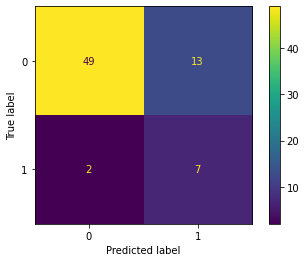

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        62
           1       0.35      0.78      0.48         9

    accuracy                           0.79        71
   macro avg       0.66      0.78      0.68        71
weighted avg       0.88      0.79      0.82        71



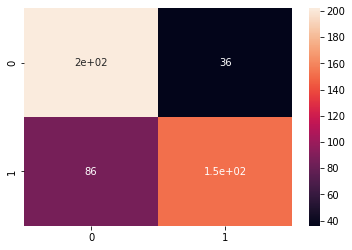

In [ ]:
y_pred = model.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=model.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=model.predict(x_train)))

0.7840501792114695
0.7436974789915967


Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

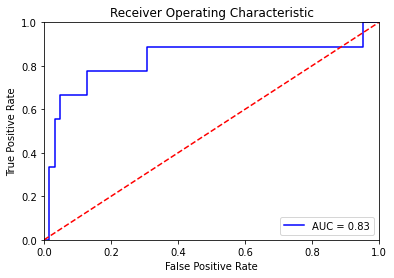

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE dataset

In [ ]:
x_train = weatherObserved_trainSMOTE_x
y_train = weatherObserved_trainSMOTE_y
x_test = weatherObserved_test_x
y_test = weatherObserved_test_y

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() # set model as Bayes. Refer lab practical for how to implement
model.fit(x_train, y_train)  # fit the data

y_pred = model.predict(x_test)  # Predict the test set
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes


Predicted Class
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1]


#### Visualise accuracy metrics

Confusion matrix for Gaussian Bayes


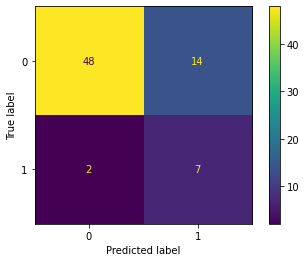

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        62
           1       0.33      0.78      0.47         9

    accuracy                           0.77        71
   macro avg       0.65      0.78      0.66        71
weighted avg       0.88      0.77      0.81        71



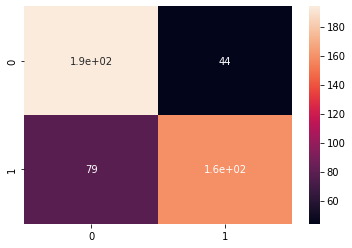

In [ ]:
y_pred = model.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=model.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=model.predict(x_train)))

0.7759856630824372
0.7415966386554621


Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

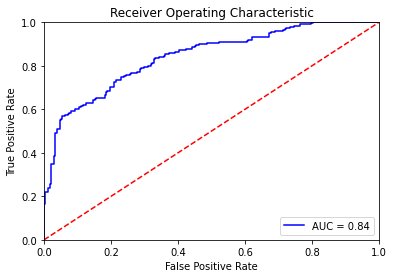

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

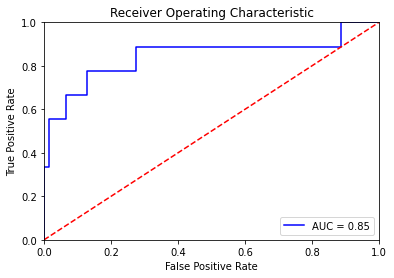

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bayes, PCA data

### Resample dataset

In [ ]:
x_train = weatherPCA_trainResample_x
y_train = weatherPCA_trainResample_y
x_test = weatherPCA_test_x
y_test = weatherPCA_test_y

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() # set model as Bayes. Refer lab practical for how to implement
model.fit(x_train, y_train)  # fit the data

y_pred = model.predict(x_test)  # Predict the test set
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes


Predicted Class
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1]


#### Visualise accuracy metrics

Confusion matrix for Gaussian Bayes


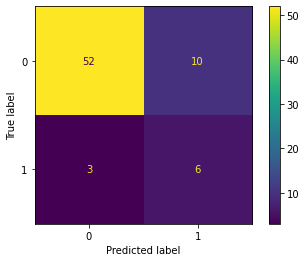

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        62
           1       0.38      0.67      0.48         9

    accuracy                           0.82        71
   macro avg       0.66      0.75      0.68        71
weighted avg       0.87      0.82      0.84        71



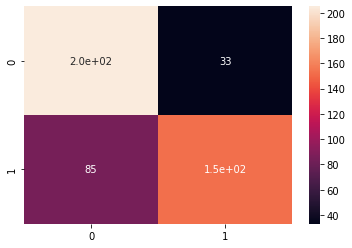

In [ ]:
y_pred = model.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=model.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=model.predict(x_train)))

0.7526881720430106
0.7521008403361346


Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

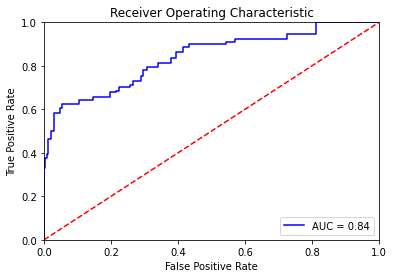

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

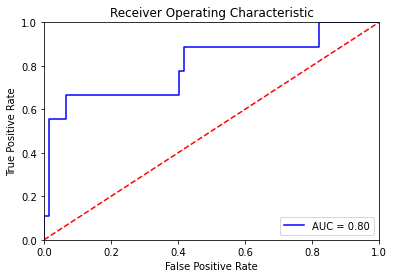

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE dataset

In [ ]:
x_train = weatherPCA_trainSMOTE_x
y_train = weatherPCA_trainSMOTE_y
x_test = weatherPCA_test_x
y_test = weatherPCA_test_y

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() # set model as Bayes. Refer lab practical for how to implement
model.fit(x_train, y_train)  # fit the data

y_pred = model.predict(x_test)  # Predict the test set
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes


Predicted Class
 [0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1]


#### Visualise accuracy metrics

Confusion matrix for Gaussian Bayes


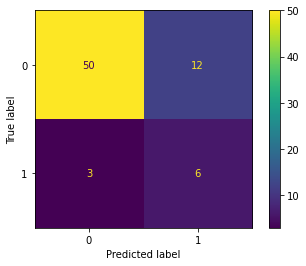

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        62
           1       0.33      0.67      0.44         9

    accuracy                           0.79        71
   macro avg       0.64      0.74      0.66        71
weighted avg       0.87      0.79      0.82        71



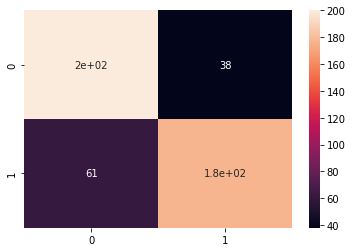

In [ ]:
y_pred = model.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=model.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=model.predict(x_train)))

0.736559139784946
0.7920168067226891


Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

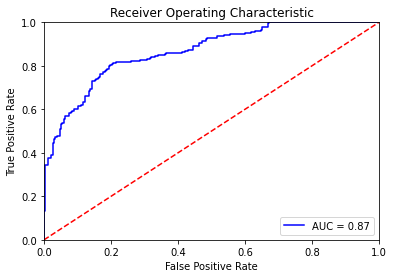

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

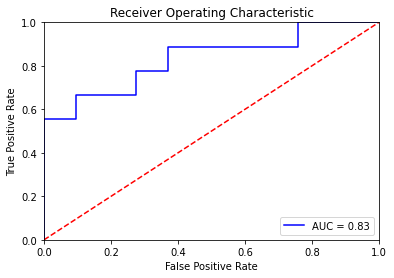

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM, observed data

Grid search: 
Set the parameters by cross-validation
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
- https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

Parameters description:
- rbf: Gamma: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

### Resample dataset

In [ ]:
x_train = weatherObserved_trainResample_x
y_train = weatherObserved_trainResample_y
x_test = weatherObserved_test_x
y_test = weatherObserved_test_y

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

model = SVC(probability=True)
tuned_parameters = [
    {"SVC__kernel": ["rbf"], "SVC__gamma": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
    {"SVC__kernel": ["linear"], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
]

scaler = StandardScaler()

pipeline = Pipeline(steps=[('scaler', scaler), ("SVC", model)])

search = GridSearchCV(pipeline, tuned_parameters, n_jobs = -1, scoring="f1_macro")
search.fit(x_train, y_train)  # fit the data
print("Best parameters set found on development set: ")
print(search.best_params_)

y_pred = search.predict(x_test)
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes

Best parameters set found on development set: 
{'SVC__C': 1.0, 'SVC__gamma': 10.0, 'SVC__kernel': 'rbf'}

Predicted Class
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Visualise result
Approx for only the first 2 columns

['MinTemp', 'Humidity9am', 'WindDir3pm', 'WindSpeed3pm']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


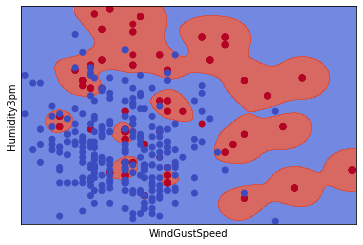

In [ ]:
plot_SVM(x_train, y_train, search)

#### Visualise accuracy metrics

Confusion matrix for Gaussian Bayes


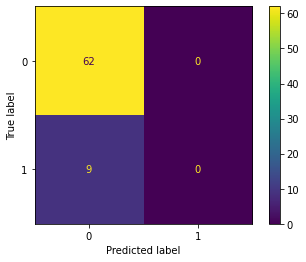

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        62
           1       0.00      0.00      0.00         9

    accuracy                           0.87        71
   macro avg       0.44      0.50      0.47        71
weighted avg       0.76      0.87      0.81        71



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


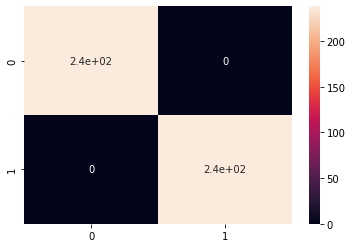

In [ ]:
y_pred = search.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=search.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=search.predict(x_train)))

0.5
1.0


Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

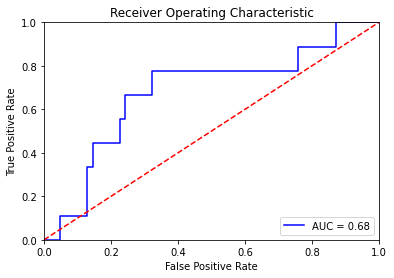

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = search.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE dataset

In [ ]:
x_train = weatherObserved_trainSMOTE_x
y_train = weatherObserved_trainSMOTE_y
x_test = weatherObserved_test_x
y_test = weatherObserved_test_y

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

model = SVC(probability=True)
tuned_parameters = [
    {"SVC__kernel": ["rbf"], "SVC__gamma": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
    {"SVC__kernel": ["linear"], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
]

scaler = StandardScaler()

pipeline = Pipeline(steps=[('scaler', scaler), ("SVC", model)])

search = GridSearchCV(pipeline, tuned_parameters, n_jobs = -1, scoring="f1_macro")
search.fit(x_train, y_train)  # fit the data
print("Best parameters set found on development set: ")
print(search.best_params_)

y_pred = search.predict(x_test)
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes

#### Visualise result
Approx for only the first 2 columns

['MinTemp', 'Humidity9am', 'WindDir3pm', 'WindSpeed3pm']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


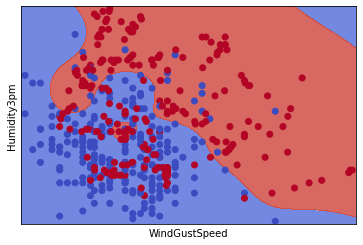

In [ ]:
plot_SVM(x_train, y_train, search)

#### Visualise accuracy metrics

Confusion matrix for Gaussian Bayes


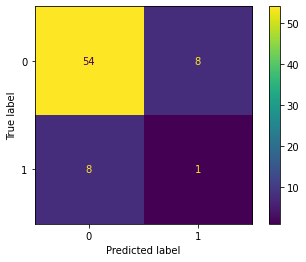

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        62
           1       0.11      0.11      0.11         9

    accuracy                           0.77        71
   macro avg       0.49      0.49      0.49        71
weighted avg       0.77      0.77      0.77        71



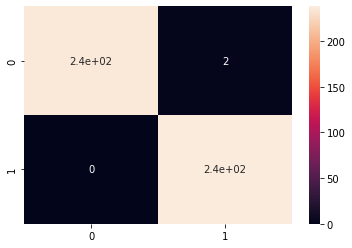

In [ ]:
y_pred = search.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=search.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=search.predict(x_train)))

0.4910394265232975
0.9957983193277311


Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

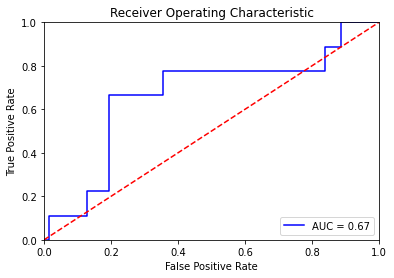

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = search.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM, PCA data

Grid search: 
Set the parameters by cross-validation
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
- https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

### Resample dataset

In [ ]:
x_train = weatherPCA_trainResample_x
y_train = weatherPCA_trainResample_y
x_test = weatherPCA_test_x
y_test = weatherPCA_test_y

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

model = SVC(probability=True)
tuned_parameters = [
    {"SVC__kernel": ["rbf"], "SVC__gamma": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
    {"SVC__kernel": ["linear"], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
]

scaler = StandardScaler()

pipeline = Pipeline(steps=[('scaler', scaler), ("SVC", model)])

search = GridSearchCV(pipeline, tuned_parameters, n_jobs = -1, scoring="f1_macro")
search.fit(x_train, y_train)  # fit the data
print("Best parameters set found on development set: ")
print(search.best_params_)

y_pred = search.predict(x_test)
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes

#### Visualise result
Approx for only the first 2 columns

['MinTemp', 'Humidity9am', 'WindDir3pm', 'WindSpeed3pm']
keeping first two columns


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


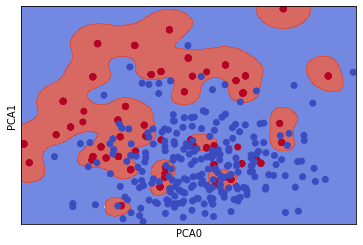

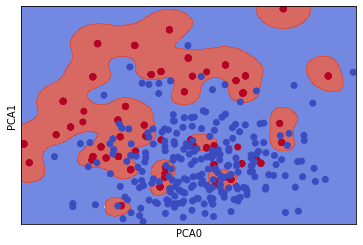

In [ ]:
plot_SVM(x_train, y_train, search)

#### Visualise accuracy metrics

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

In [ ]:
y_pred = search.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=search.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=search.predict(x_train)))

Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

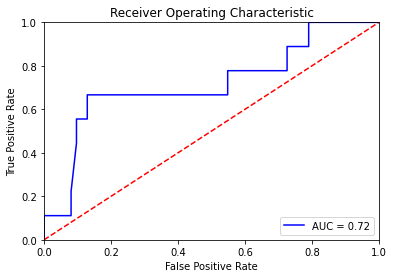

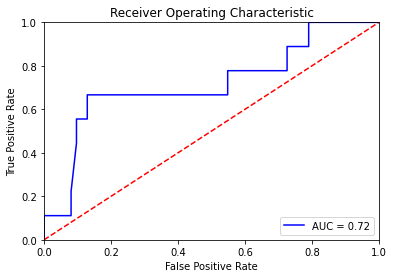

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = search.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE dataset

In [ ]:
x_train = weatherPCA_trainSMOTE_x
y_train = weatherPCA_trainSMOTE_y
x_test = weatherPCA_test_x
y_test = weatherPCA_test_y

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

model = SVC(probability=True)
tuned_parameters = [
    {"SVC__kernel": ["rbf"], "SVC__gamma": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
    {"SVC__kernel": ["linear"], "SVC__C": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},
]

scaler = StandardScaler()

pipeline = Pipeline(steps=[('scaler', scaler), ("SVC", model)])

search = GridSearchCV(pipeline, tuned_parameters, n_jobs = -1, scoring="f1_macro")
search.fit(x_train, y_train)  # fit the data
print("Best parameters set found on development set: ")
print(search.best_params_)

y_pred = search.predict(x_test)
print('\nPredicted Class\n', y_pred)  # Print the predicted outcomes

Best parameters set found on development set: 
{'SVC__C': 1.0, 'SVC__gamma': 1.0, 'SVC__kernel': 'rbf'}

Predicted Class
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best parameters set found on development set: 
{'SVC__C': 1.0, 'SVC__gamma': 1.0, 'SVC__kernel': 'rbf'}

Predicted Class
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Visualise result
Approx for only the first 2 columns

['MinTemp', 'Humidity9am', 'WindDir3pm', 'WindSpeed3pm']
keeping first two columns


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


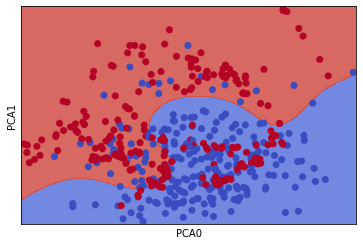

In [ ]:
plot_SVM(x_train, y_train, search)

#### Visualise accuracy metrics

Confusion matrix for Gaussian Bayes


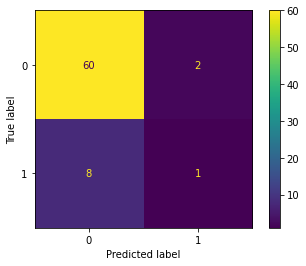

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion matrix for Gaussian Bayes')
confusion_matrix(y_test, y_pred)  # Print the confusion matrix. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # print classification report, screenshot this. Also print accuracy

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.33      0.11      0.17         9

    accuracy                           0.86        71
   macro avg       0.61      0.54      0.54        71
weighted avg       0.81      0.86      0.83        71



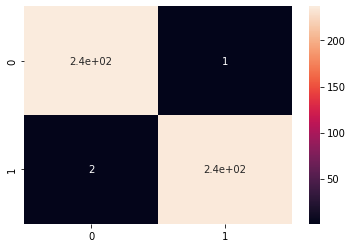

In [ ]:
y_pred = search.predict(x_train) # Predict the train set
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True); # print heatmap, set to display values, screenshot this.


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
# Using the scikit way. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

print(roc_auc_score(y_true=y_test, y_score=search.predict(x_test)))
print(roc_auc_score(y_true=y_train, y_score=search.predict(x_train)))

0.5394265232974911
0.9936974789915967


Reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

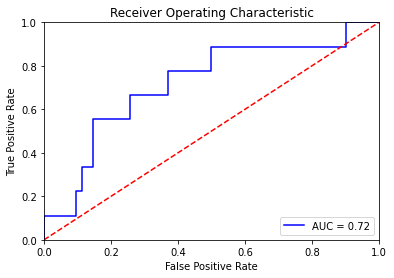

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = search.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()